# Colocar descriptiva de la base de datos


👨‍💻 Jazmin Elena Pesca Muñoz - Yudi Elena Ruiz Hernandez

📧jazpescamu@gmail.com - yudi.ruiz@ucaldas.edu.co
Análisis de la Oferta de Programas de Educación para el Trabajo y el Desarrollo Humano (ETDH) en Colombia mediante Técnicas de Aprendizaje No Supervisado.


In [ ]:
# @title Conexión con la base de datos desde una URL

#@markdown - Forma 1 de descarga de archivos desde Google Drive con wget
# Forma de descarga de archivos desde Google Drive con wget
# Se requiere el uso de cookies para la autenticación
# Se debe obtener el ID del archivo de Google Drive para poder descargarlo
# Se usa el comando wget para descargar el archivo, gestionando las cookies
# param url: URL de la base de datos
# param nombre_archivo: Nombre del archivo a guardar

# Descargar el archivo usando wget, gestionando las cookies
# Se usa --load-cookies para cargar las cookies guardadas temporalmente en /tmp/cookies.txt
# Se hace una primera solicitud con wget para obtener el token de confirmación que Google Drive envía cuando el archivo es grande o muy accedido
# El token se extrae usando sed (una utilidad para filtrar y procesar texto), que busca el patrón "confirm=" y captura el valor del token
# Una vez obtenido el token de confirmación, se realiza la descarga completa del archivo
# --no-check-certificate es usado para evitar errores de SSL (certificados) en entornos no seguros
# El archivo se guarda como "Spotify_Most_Streamed_Songs.csv" . indicado con el nombre del archivo en la variable "nombre_archivo"
# Finalmente, se eliminan las cookies temporales almacenadas en /tmp/cookies.txt

# Primer archivo
# URL = 'https://drive.google.com/file/d/1yJzHUV_U52wGmLvhN06IvnvJ_NDwbImI/view?usp=sharing'
# Definir el ID del archivo de Google Drive
FILEID = '1yJzHUV_U52wGmLvhN06IvnvJ_NDwbImI'
# Programas educación para el trabajo y el desarrollo humano
nombre_archivo1 = 'MEN_PROGRAMAS_EDUCACI_N_PARA_EL_TRABAJO_Y_EL_DESARROLLO_HUMANO_20250308.csv'
# con esta instrucción se descarga el archivo desde Google Drive
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O $nombre_archivo1 && rm -rf /tmp/cookies.txt


--2025-03-12 01:54:53--  https://docs.google.com/uc?export=download&confirm=&id=1yJzHUV_U52wGmLvhN06IvnvJ_NDwbImI
Resolving docs.google.com (docs.google.com)... 142.251.167.100, 142.251.167.113, 142.251.167.101, ...
Connecting to docs.google.com (docs.google.com)|142.251.167.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1yJzHUV_U52wGmLvhN06IvnvJ_NDwbImI&export=download [following]
--2025-03-12 01:54:54--  https://drive.usercontent.google.com/download?id=1yJzHUV_U52wGmLvhN06IvnvJ_NDwbImI&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 64.233.180.132, 2607:f8b0:4004:c21::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|64.233.180.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9450393 (9.0M) [application/octet-stream]
Saving to: ‘MEN_PROGRAMAS_EDUCACI_N_PARA_EL_TRABAJO_Y_EL_DESARROLLO_HUMANO_20250308.c

# Desglose:

- FILEID = 'Programas educación para el trabajo y el desarrollo humano': El ID del archivo de Google Drive que se desea descargar.
- Primera llamada wget:
Obtiene un token de confirmación cuando Google Drive requiere verificación extra para archivos grandes o descargados muchas veces.\
Usa sed para buscar y extraer el token de la respuesta de Google Drive.
- Segunda llamada wget:
Con el token, se realiza la descarga final del archivo.\
rm -rf /tmp/cookies.txt: Limpia las cookies temporales después de completar la descarga.

In [ ]:
# @title Instalar librerias a usar
%pip install sweetviz
%pip install missingno

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 82.3 MB/s eta 0:00:00


In [ ]:
# @title Carga de librerias
# Bibliotecas utilizadas
# ----------------------------------------------------------------------------
# pandas (pd): librería para el análisis de datos
# matplotlib (plt): librería para crear gráficos
# seaborn (sns): librería para visualizar datos de manera estética
# Sweetviz (sw): Una biblioteca de análisis y visualización de datos en Python.
# files : Importa la función para subir y descargar archivos en Google Colab.
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sw
from google.colab import files
import numpy as np
import missingno as msno

In [ ]:
# @title Cargamos las funciones relacionadas
def analizar_columnas(df):
  """
  Analiza las columnas de un DataFrame y devuelve información estadística.

  Parámetros:
  df (DataFrame): El DataFrame a analizar.

  Retorno:
  Un DataFrame con la información estadística de cada columna.

  Ejemplo:
  df_analizado = analizar_columnas(df)
  print(df_analizado)
  """
  info = []
  for columna in df.columns:
    unicos = df[columna].nunique()
    nulos = df[columna].isnull().sum()
    total = len(df)
    porcentaje_nulos = (nulos / total) * 100
    info.append({
      'Columna': columna,
      'Cantidad de registros': total,
      'Únicos': unicos,
      'Cantidad de nulos': nulos,
      'Porcentaje de nulos': porcentaje_nulos,
      'Registros relacionados con nulos': total - nulos
    })
  return pd.DataFrame(info)


# Sección 1

### Paso 1: Cargar el archivo CSV

In [ ]:
nombre_archivo1

'MEN_PROGRAMAS_EDUCACI_N_PARA_EL_TRABAJO_Y_EL_DESARROLLO_HUMANO_20250308.csv'

In [ ]:
#  @title Ubicación en donde se almacena en drive
# Cargar el archivo CSV de df_trabajo_y_desarrollo
df_trabajo_y_desarrollo = pd.read_csv(nombre_archivo1, delimiter=';', on_bad_lines='skip')

In [ ]:
# Mostrar las primeras filas del archivo para ver cómo están organizados los datos
print("Primeras 5 filas de los datos de df_trabajo_y_desarrollo:")
df_trabajo_y_desarrollo.head()

Primeras 5 filas de los datos de -------:


Código Secretaria                                      Secretaria  \
0             3,813     SECRETARÍA DE EDUCACIÓN DEPARTAMENTAL SUCRE   
1             4,911    SECRETARÍA DE EDUCACIÓN DISTRITO SANTA MARTA   
2             3,774  SECRETARÍA DE EDUCACIÓN MUNICIPAL DE MANIZALES   
3             3,782   SECRETARÍA DE EDUCACIÓN MUNICIPAL DE MONTERÍA   
4             3,788     SECRETARÍA DE EDUCACIÓN MUNICIPAL DE SOACHA   

  Código Institución                    Nombre Institución Código Programa  \
0              7,454                           JEAN PIAGET          48,031   
1              8,846  CENTRO DE ESTUDIO DE LENGUA FRANCESA          40,959   
2              3,642                 UNIVERSIDAD DE CALDAS          18,541   
3              6,152             INSTITUTO BIBLICO CENTRAL          10,833   
4              1,769    ESCUELA DE SALUD TERESA DE CALCUTA          12,247   

                                  Nombre Programa  Cod Departamento  \
0       TÉCNICO LABORAL EN AUXILIAR EN PREESCOLAR                70   
1                                    ELEMENTAL A1                47   
2  CONOCIMIENTOS ACADÉMICOS EN PORTUGUES NIVEL A2                17   
3                             SAGRADAS ESCRITURAS                23   
4                          AUXILIAR en ENFERMERIA                25   

   Departamento Cod Municipio    Municipio  ... Certificado Calidad  \
0         SUCRE        70,708   SAN MARCOS  ...                 NaN   
1     MAGDALENA        47,001  SANTA MARTA  ...                 NaN   
2        CALDAS        17,001    MANIZALES  ...                 NaN   
3       CÓRDOBA        23,001     MONTERIA  ...                 NaN   
4  CUNDINAMARCA        25,754       SOACHA  ...                 NaN   

  Estado Certificación Entidad Emisora Certificación Fecha Otorgamiento  \
0                  NaN                           NaN                NaN   
1                  NaN                           NaN                NaN   
2                  NaN                           NaN                NaN   
3                  NaN                           NaN                NaN   
4                  NaN                           NaN                NaN   

  Fecha Vencimiento Latitud Longitud Año Corte Mes Corte  \
0               NaN     NaN      NaN     2,020        11   
1               NaN     NaN      NaN     2,020        11   
2               NaN     NaN      NaN     2,020        11   
3               NaN     NaN      NaN     2,020        11   
4               NaN     NaN      NaN     2,020        11   

              Fecha Corte  
0  11/30/2020 12:00:00 AM  
1  11/30/2020 12:00:00 AM  
2  11/30/2020 12:00:00 AM  
3  11/30/2020 12:00:00 AM  
4  11/30/2020 12:00:00 AM  

[5 rows x 36 columns]

In [ ]:
df_trabajo_y_desarrollo = df_trabajo_y_desarrollo.rename(columns={'Estado Certificación':'Estado Certificación_'})
df_trabajo_y_desarrollo = df_trabajo_y_desarrollo.rename(columns={'Entidad Emisora Certificación':'Estado Certificación'})
df_trabajo_y_desarrollo = df_trabajo_y_desarrollo.rename(columns={'Estado Certificación_':'Entidad Emisora Certificación'})


In [ ]:
df_trabajo_y_desarrollo['Estado Certificación'].unique()

array([nan, 'VENCIDO', 'RENOVADO', 'PRIMERA VEZ', 'CANCELADA'],
      dtype=object)

In [ ]:
df_trabajo_y_desarrollo['Costo'] = df_trabajo_y_desarrollo['Costo'].astype(str).str.replace(',', '', regex=False)

df_trabajo_y_desarrollo['Costo'] = df_trabajo_y_desarrollo['Costo'].astype(float)
df_trabajo_y_desarrollo['Costo'][df_trabajo_y_desarrollo['Costo']<1000].value_counts()

Costo
0.0      320
600.0      7
1.0        4
200.0      2
452.0      1
680.0      1
3.0        1
540.0      1
100.0      1
120.0      1
450.0      1
24.0       1
480.0      1
806.0      1
626.0      1
304.0      1
670.0      1
657.0      1
800.0      1
397.0      1
25.0       1
637.0      1
900.0      1
Name: count, dtype: int64

In [ ]:
# @title Visualización de composición de la base de datos.
df_trabajo_y_desarrollo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19867 entries, 0 to 19866
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Código Secretaria              19867 non-null  object 
 1   Secretaria                     19867 non-null  object 
 2   Código Institución             19867 non-null  object 
 3   Nombre Institución             19867 non-null  object 
 4   Código Programa                19867 non-null  object 
 5   Nombre Programa                19867 non-null  object 
 6   Cod Departamento               19867 non-null  int64  
 7   Departamento                   19867 non-null  object 
 8   Cod Municipio                  19867 non-null  object 
 9   Municipio                      19867 non-null  object 
 10  Localidad                      3444 non-null   object 
 11  Dirección                      19867 non-null  object 
 12  Sede                           19867 non-null 

### Paso 2: Explorar los datos

Vamos a verificar la estructura de los datos, la cantidad de filas y columnas, así como cualquier dato vacío.

In [ ]:
# @title Verificar la forma de los datos
print(f"Forma de los datos (filas, columnas): {df_trabajo_y_desarrollo.shape}")

Forma de los datos (filas, columnas): (19867, 36)


In [ ]:
# @title Verificar los tipos de datos de cada columna
print("\nTipos de datos por columna:")
print(df_trabajo_y_desarrollo.dtypes)


Tipos de datos por columna:
Código Secretaria                 object
Secretaria                        object
Código Institución                object
Nombre Institución                object
Código Programa                   object
Nombre Programa                   object
Cod Departamento                   int64
Departamento                      object
Cod Municipio                     object
Municipio                         object
Localidad                         object
Dirección                         object
Sede                              object
Estado Programa                   object
Registro                          object
Fecha Registro                    object
Área Desempeño                    object
Área Desempeño Salud              object
Tipo Certificado                  object
Subtipo Certificado               object
Escolaridad                       object
Jornadas                          object
Costo                            float64
Duración Horas              

In [ ]:
# @title Verificación de los campos con relación a la composición de la base de dato almacenada en formato CSV
df_analizado = analizar_columnas(df_trabajo_y_desarrollo)
df_analizado

Columna  Cantidad de registros  Únicos  \
0               Código Secretaria                  19867      94   
1                      Secretaria                  19867      94   
2              Código Institución                  19867    3501   
3              Nombre Institución                  19867    3201   
4                 Código Programa                  19867   19867   
5                 Nombre Programa                  19867    9771   
6                Cod Departamento                  19867      31   
7                    Departamento                  19867      31   
8                   Cod Municipio                  19867     424   
9                       Municipio                  19867     412   
10                      Localidad                  19867      22   
11                      Dirección                  19867    3876   
12                           Sede                  19867    2586   
13                Estado Programa                  19867       3   
14                       Registro                  19867   16670   
15                 Fecha Registro                  19867    2057   
16                 Área Desempeño                  19867       9   
17           Área Desempeño Salud                  19867       5   
18               Tipo Certificado                  19867       3   
19            Subtipo Certificado                  19867       4   
20                    Escolaridad                  19867       6   
21                       Jornadas                  19867      10   
22                          Costo                  19867    3444   
23                 Duración Horas                  19867     860   
24           Número Certificación                  19867       2   
25             Tipo Certificación                  19867    1000   
26            Certificado Calidad                  19867       6   
27  Entidad Emisora Certificación                  19867       7   
28           Estado Certificación                  19867       4   
29             Fecha Otorgamiento                  19867     454   
30              Fecha Vencimiento                  19867     468   
31                        Latitud                  19867      79   
32                       Longitud                  19867      79   
33                      Año Corte                  19867       1   
34                      Mes Corte                  19867       1   
35                    Fecha Corte                  19867       1   

    Cantidad de nulos  Porcentaje de nulos  Registros relacionados con nulos  
0                   0             0.000000                             19867  
1                   0             0.000000                             19867  
2                   0             0.000000                             19867  
3                   0             0.000000                             19867  
4                   0             0.000000                             19867  
5                   0             0.000000                             19867  
6                   0             0.000000                             19867  
7                   0             0.000000                             19867  
8                   0             0.000000                             19867  
9                   0             0.000000                             19867  
10              16423            82.664720                              3444  
11                  0             0.000000                             19867  
12                  0             0.000000                             19867  
13                  0             0.000000                             19867  
14                  0             0.000000                             19867  
15                  0             0.000000                             19867  
16               3727            18.759752                             16140  
17              18628            93.763527                              1239  
18      

<Axes: >

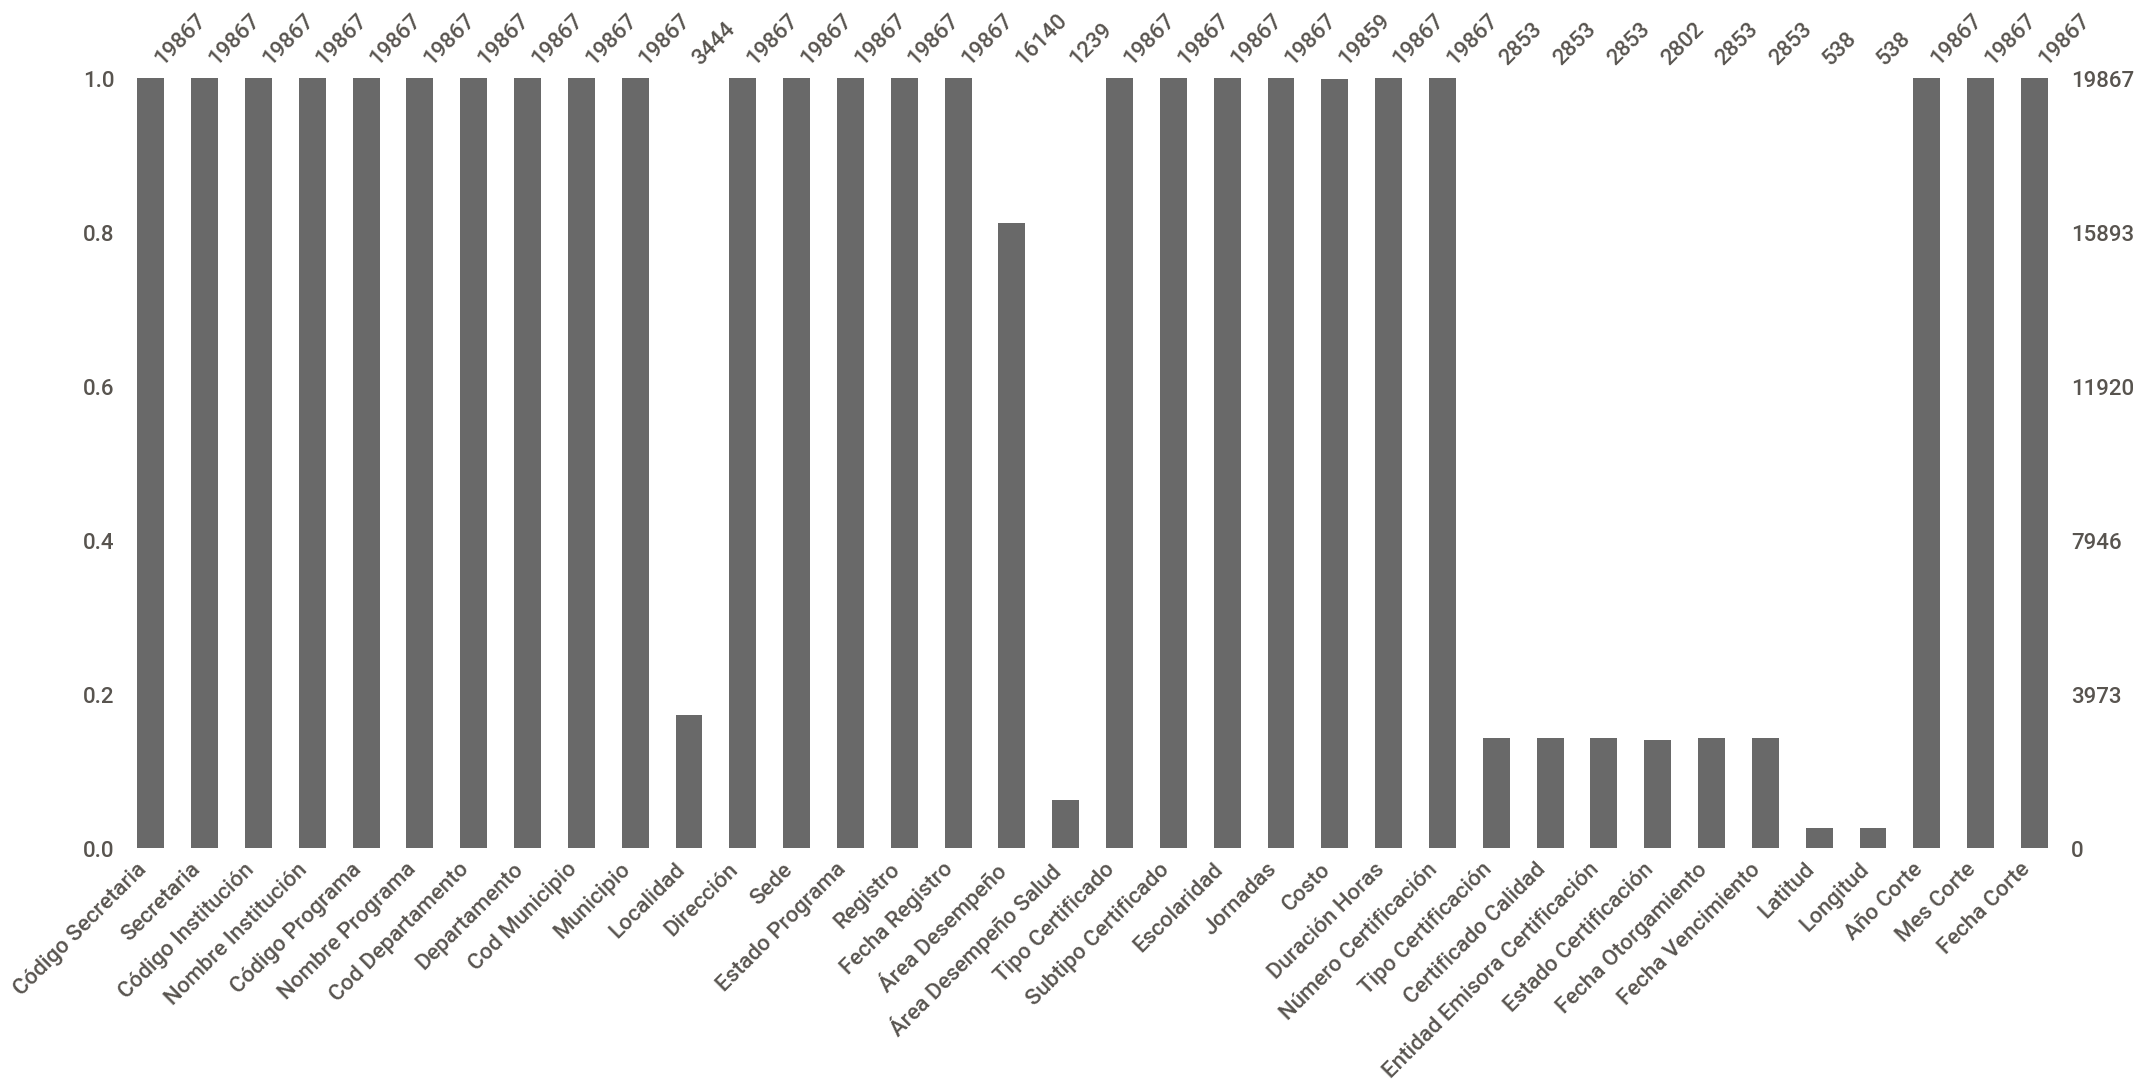

In [ ]:
# Visualizar valores nulos con un gráfico de barras
msno.bar(df_trabajo_y_desarrollo)


<Axes: >

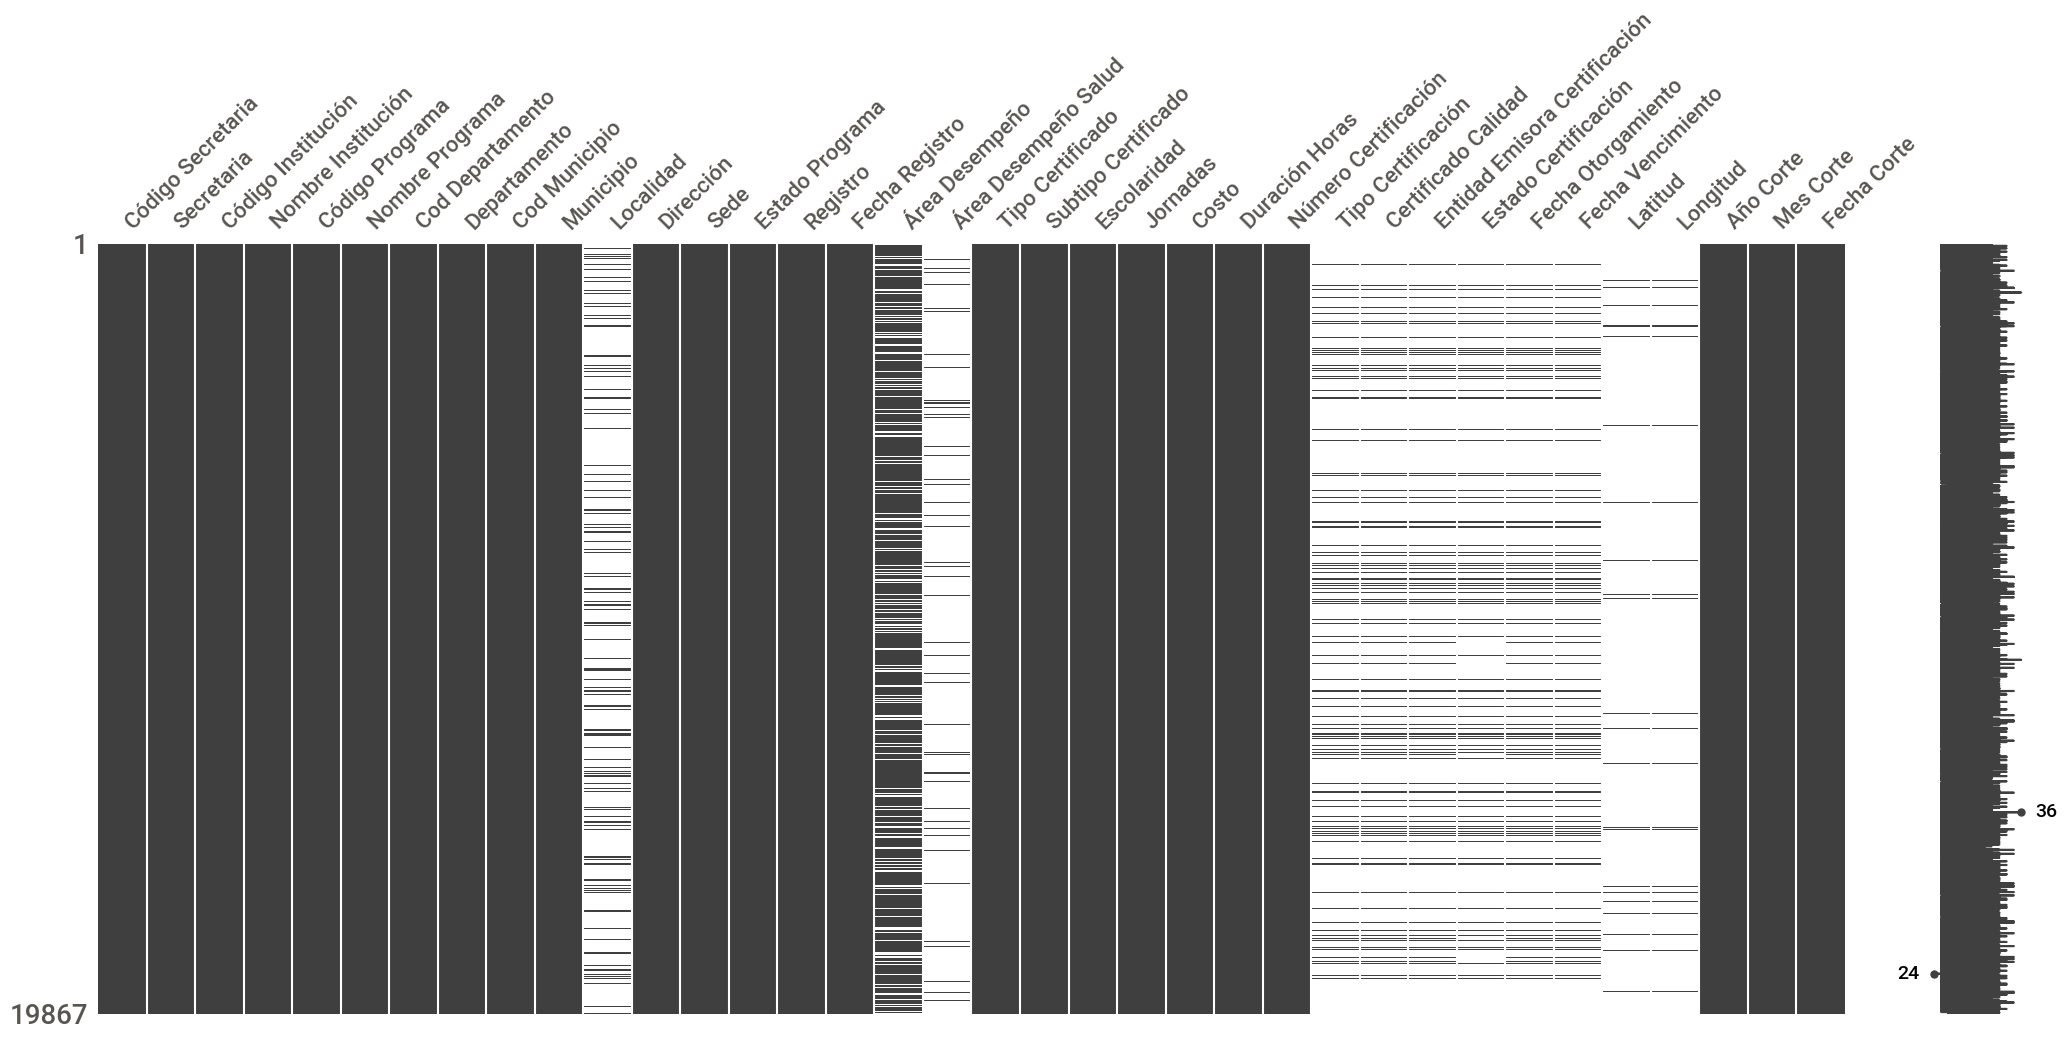

In [ ]:
# Visualizar matriz de valores faltantes
msno.matrix(df_trabajo_y_desarrollo)

<Axes: >

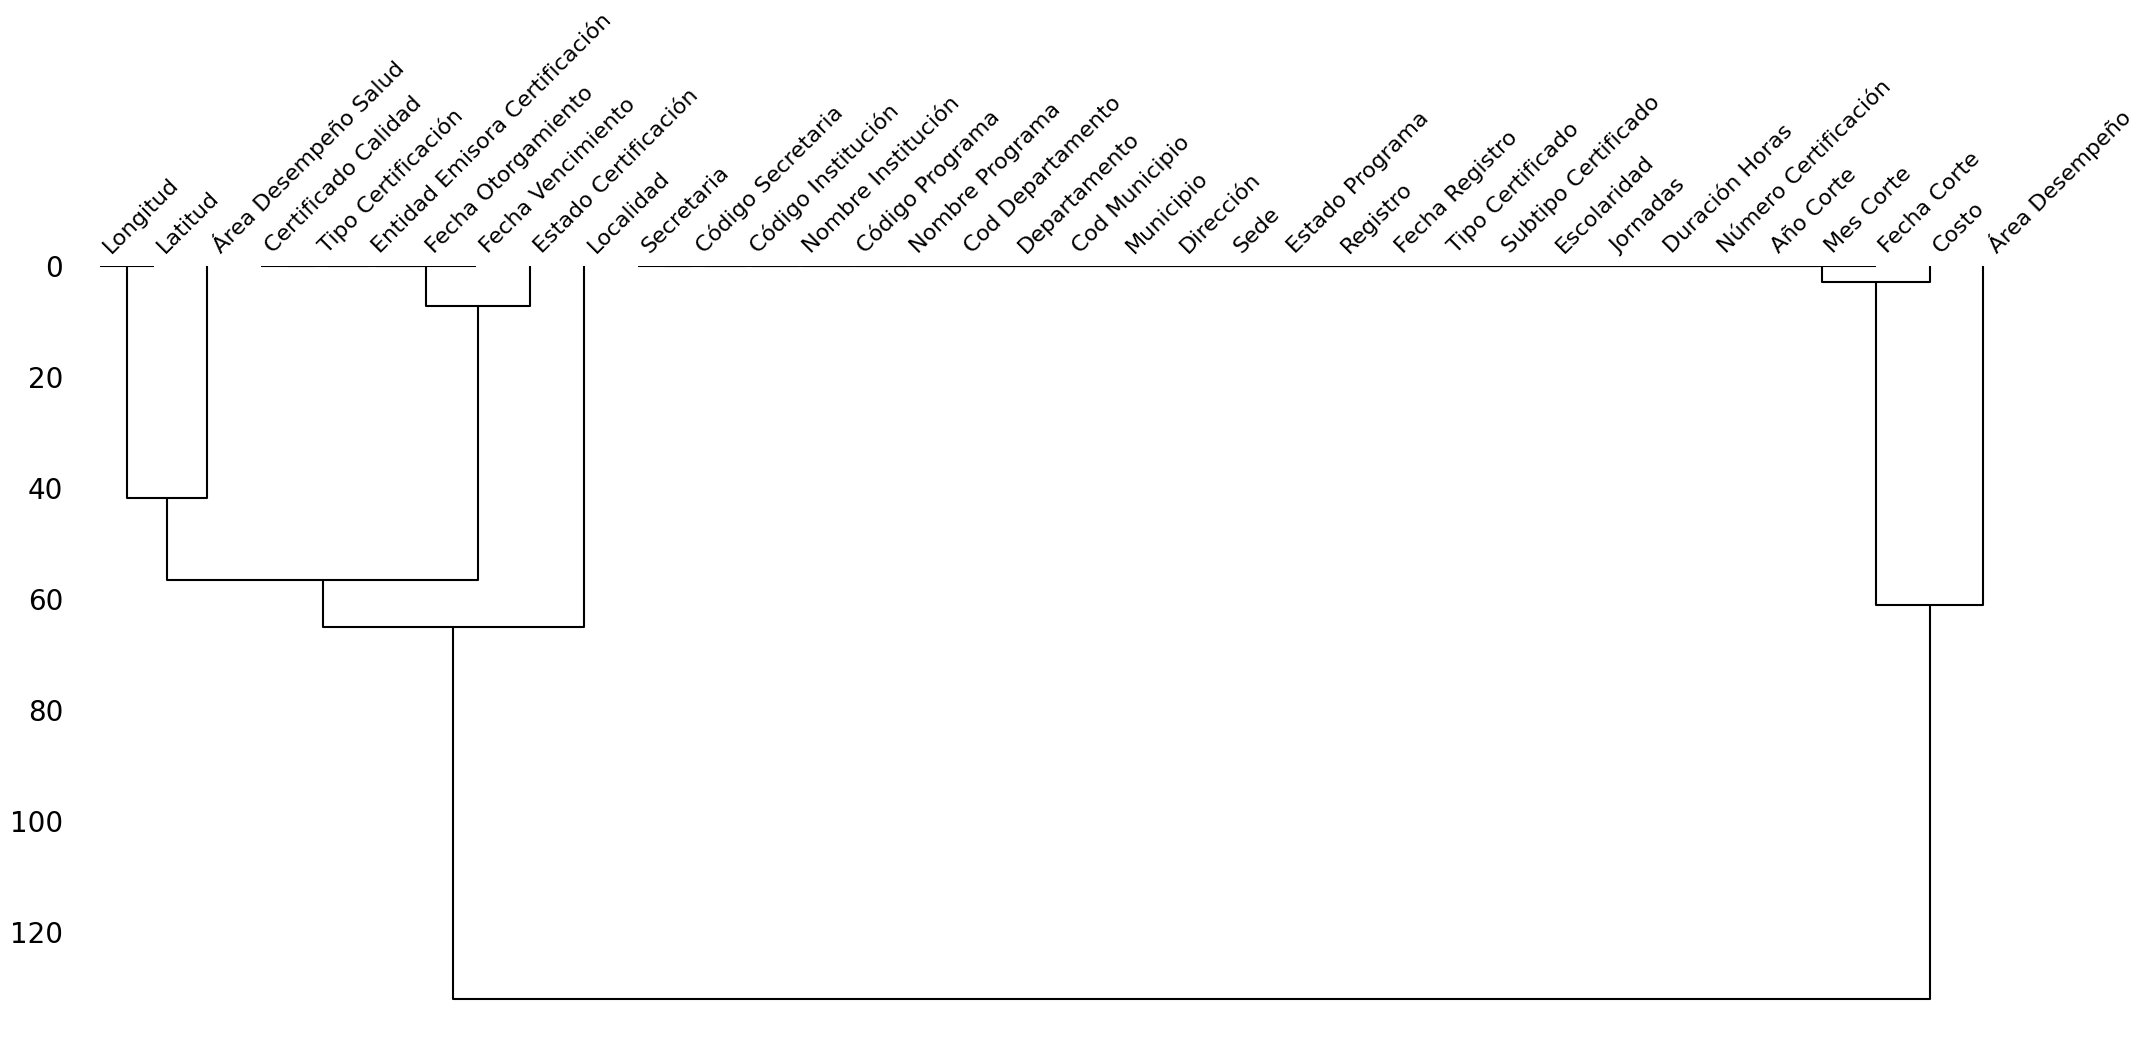

In [ ]:
# Visualizar dendrograma para identificar patrones de valores faltantes
msno.dendrogram(df_trabajo_y_desarrollo)

# Sección 2

### Paso 3: Graficar distribuciones


Ahora, vamos a generar gráficos para visualizar algunas características de las canciones, como la distribución de la popularidad, la cantidad de reproducciones, y cualquier otra métrica relevante.

In [ ]:
# @title Análisis exploratorio de datos (EDA)
#Configurar las opciones de visualizacion Sweetviz
sw.config_parser.read_string("""
                              [Output_Defaults]
                              html_layout = widescreen
                              html_scale = 1.0
                              notebook_layout = widescreen
                              notebook_scale = 0.9
                              notebook_width = 100%
                              notebook_height = 700
                              [Layout]
                              show_logo = 0
                              """)
nombre = 'Educación para el trabajo y desarrollo humano'
advert_report = sw.analyze([df_trabajo_y_desarrollo, nombre]) # Realizamos el análisis de la base de datos inicial

#@markdown Guardar y mostrar reporte formato HTML
advert_report.show_html('EDA_df_trabajo_y_desarrollo.html')

#@markdown Descarga y abre el reporte en una nueva pestaña del navegador
almacenar_archivo = input('Alamcenar archivo Si o No: ').title()
if almacenar_archivo == 'Si':
  files.download('/content/EDA_df_trabajo_y_desarrollo.html')

                                             |          | [  0%]   00:00 -> (? left)

Report EDA_df_trabajo_y_desarrollo.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
Alamcenar archivo Si o No: si


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


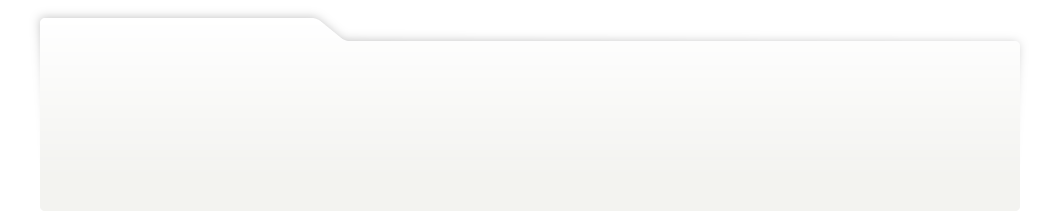
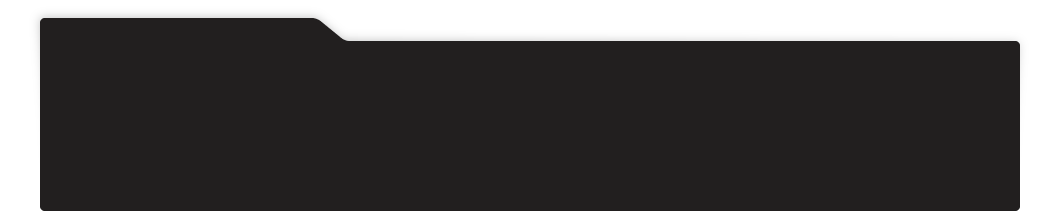
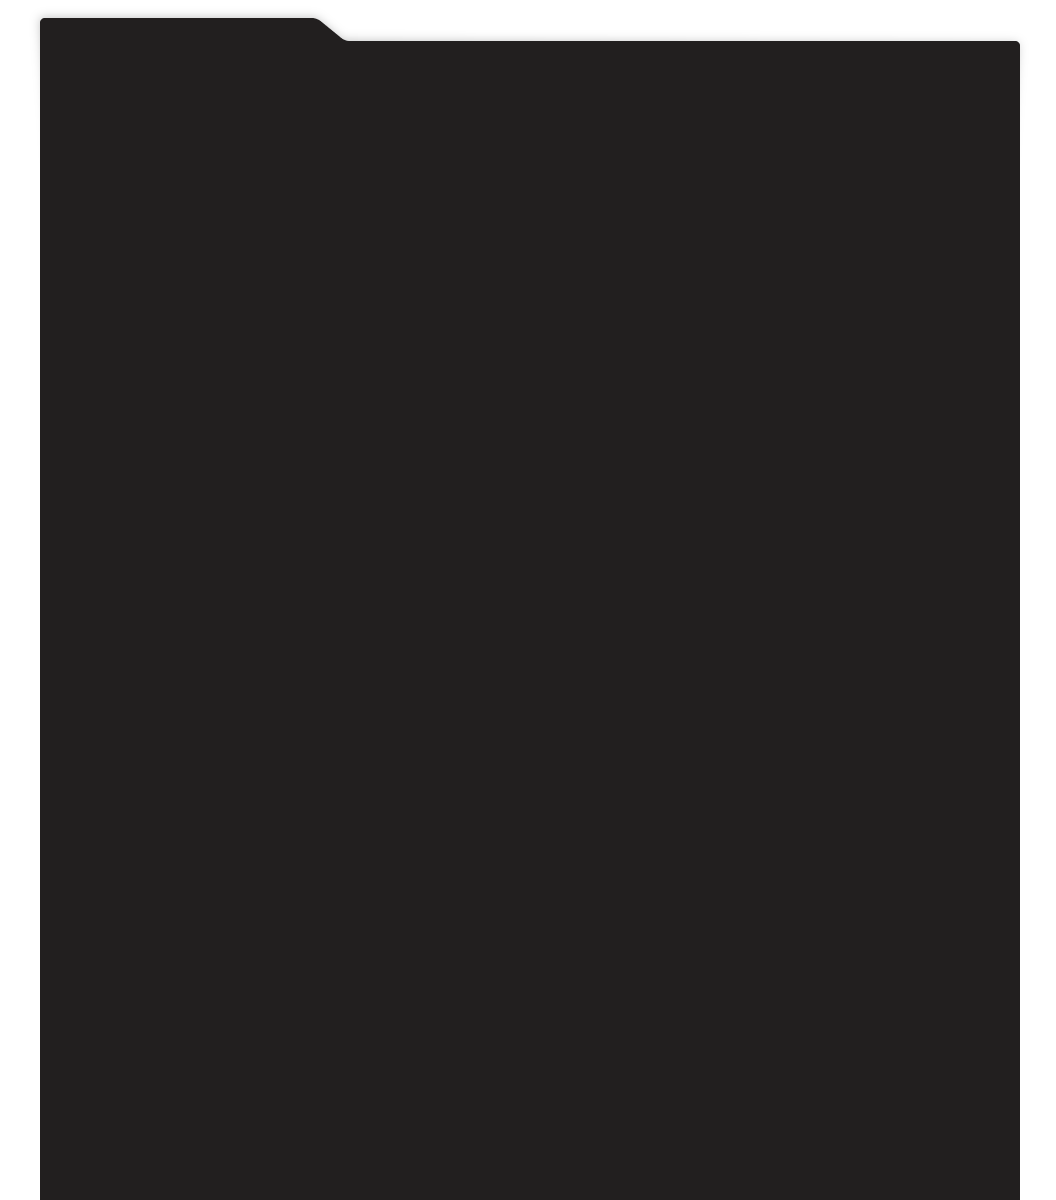
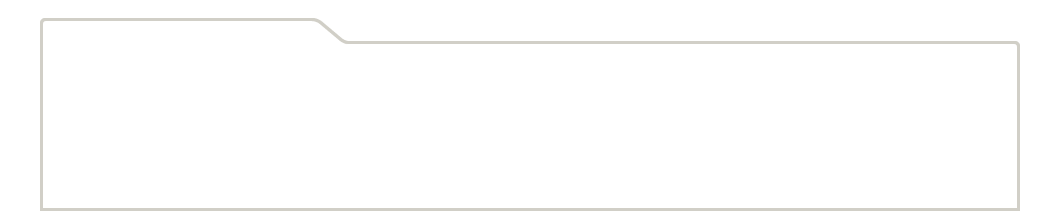
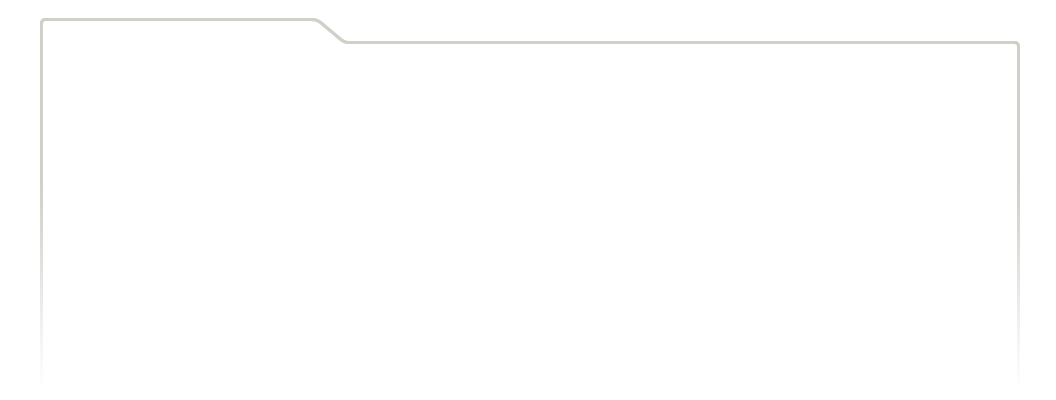
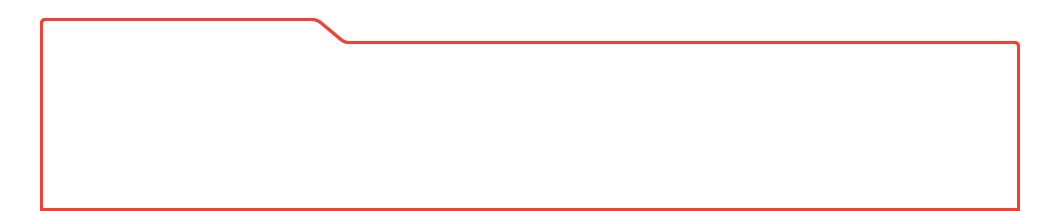
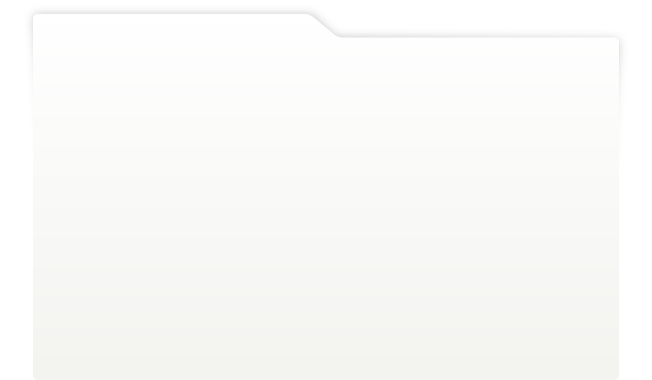
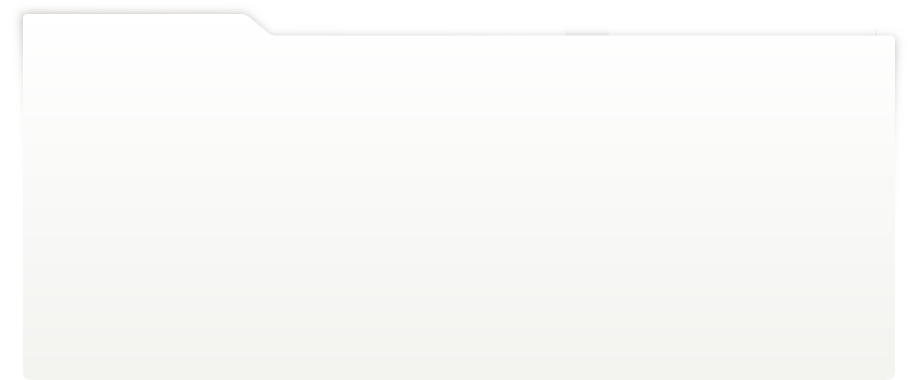
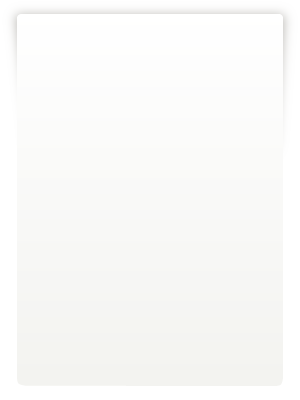
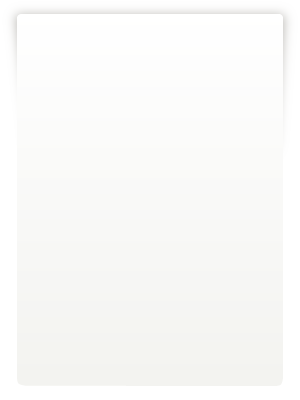
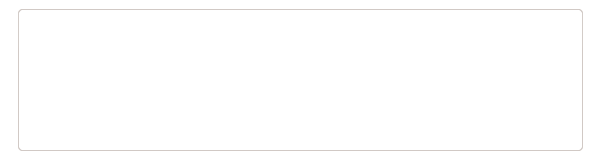
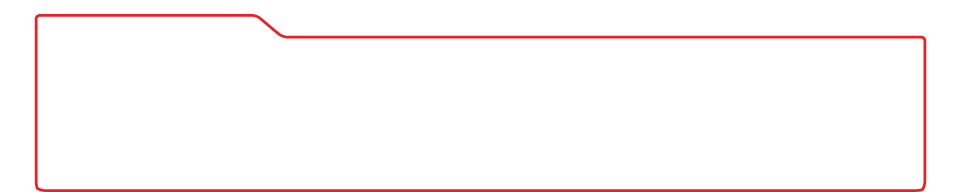
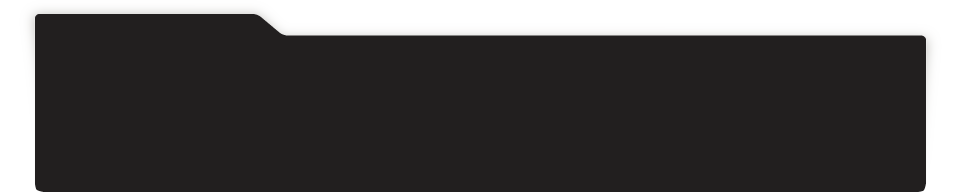
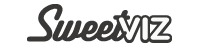
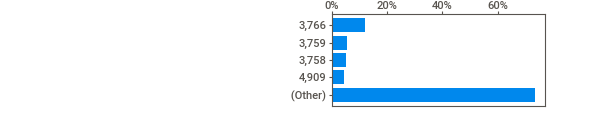
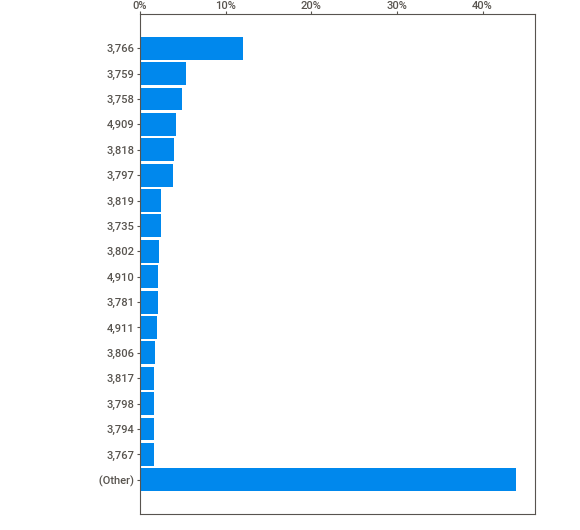
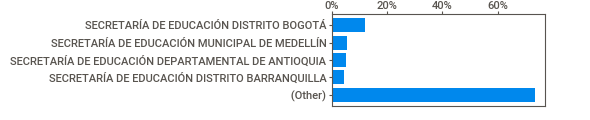
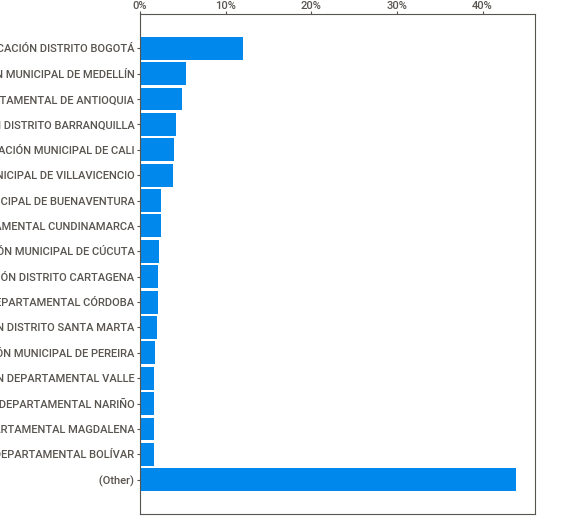
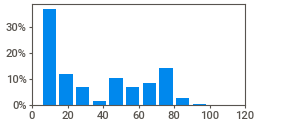
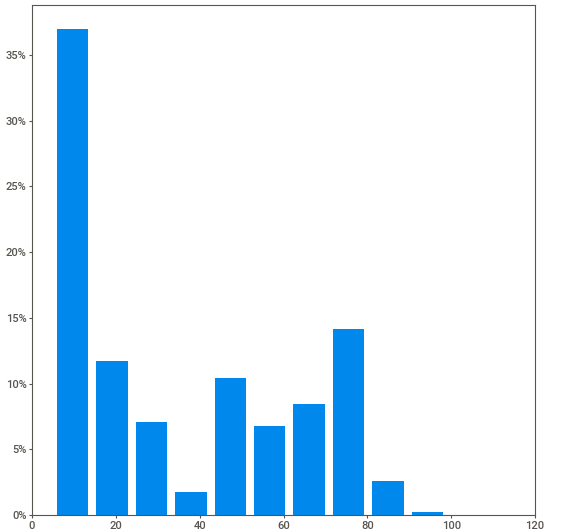
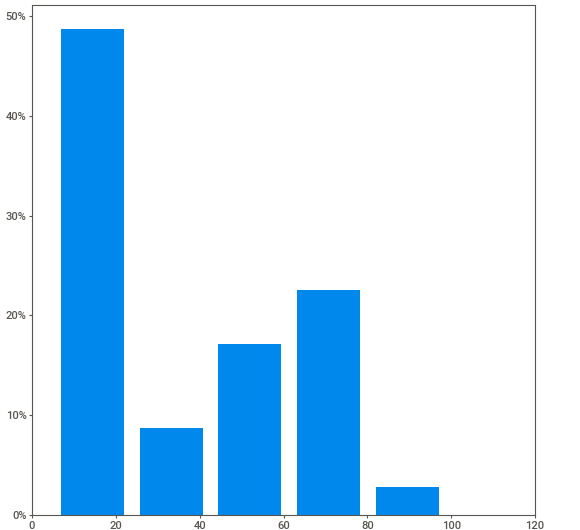
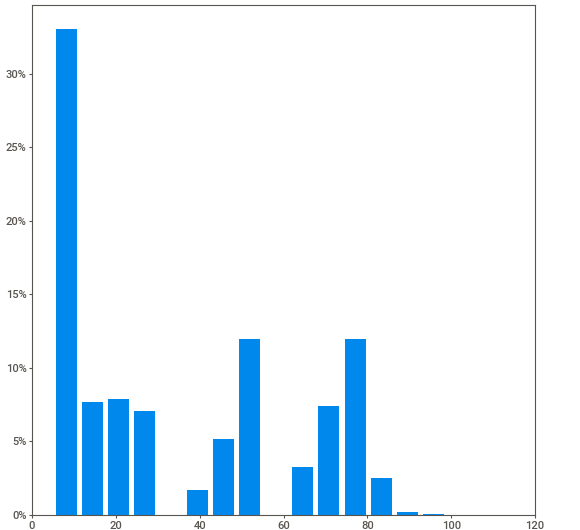
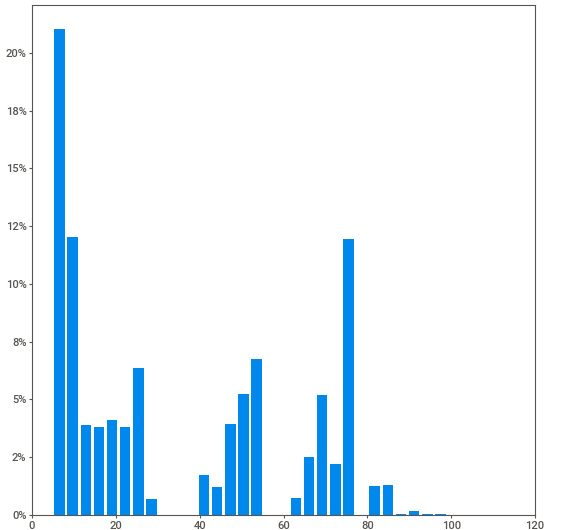
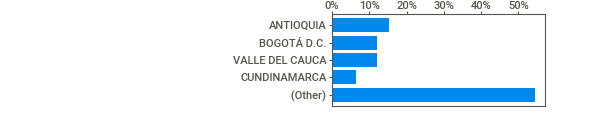
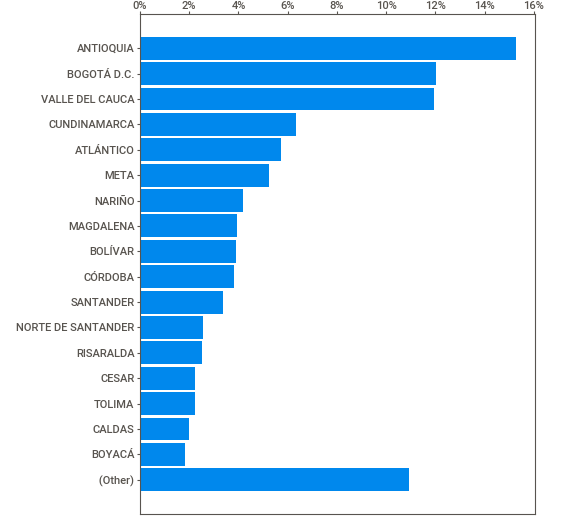
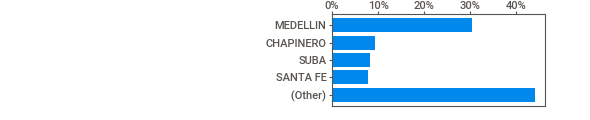
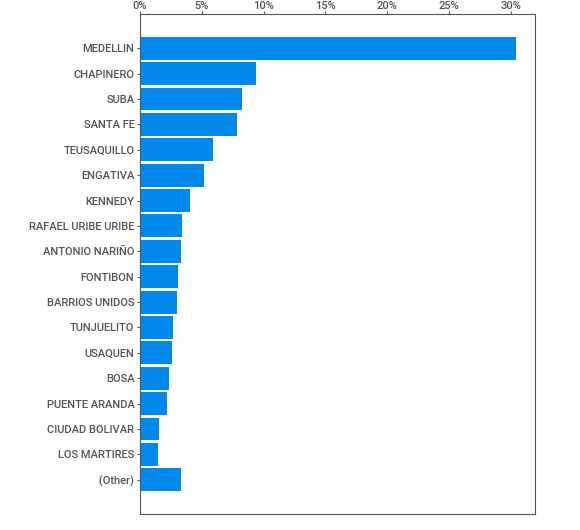
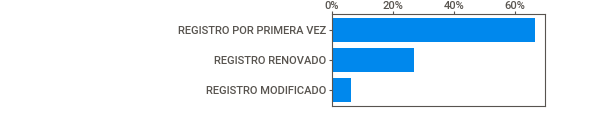
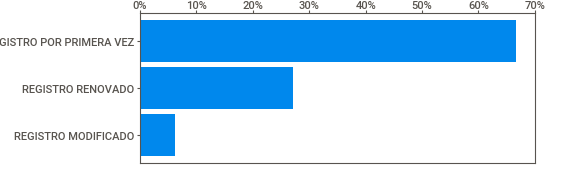
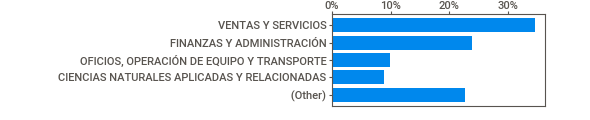
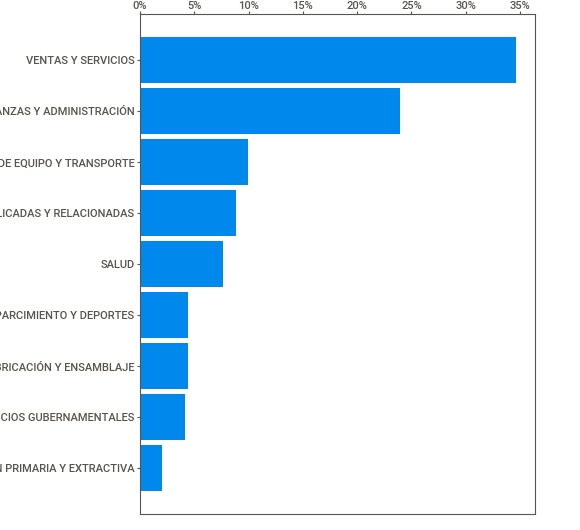
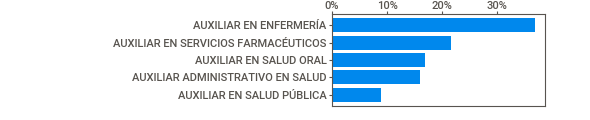
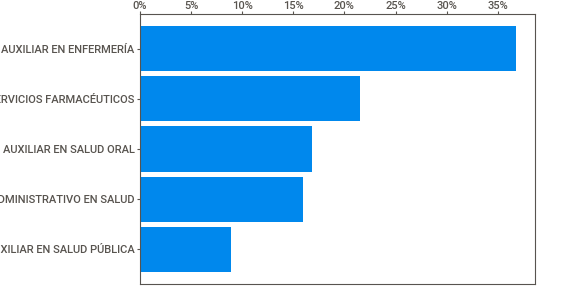
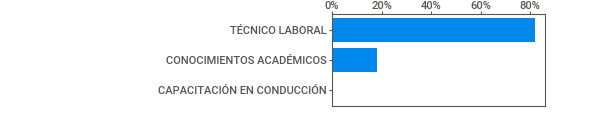
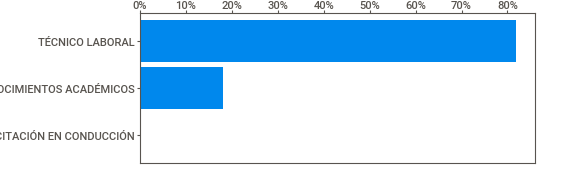
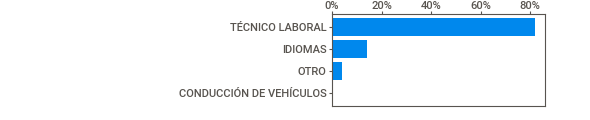
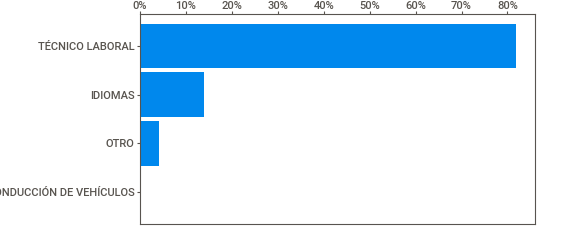
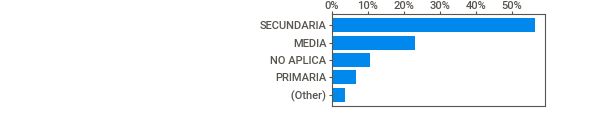
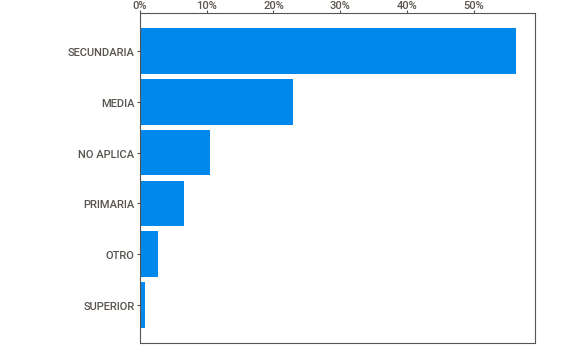
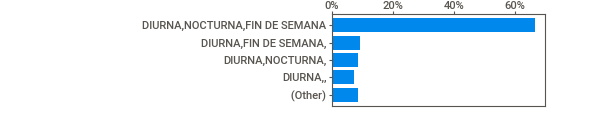
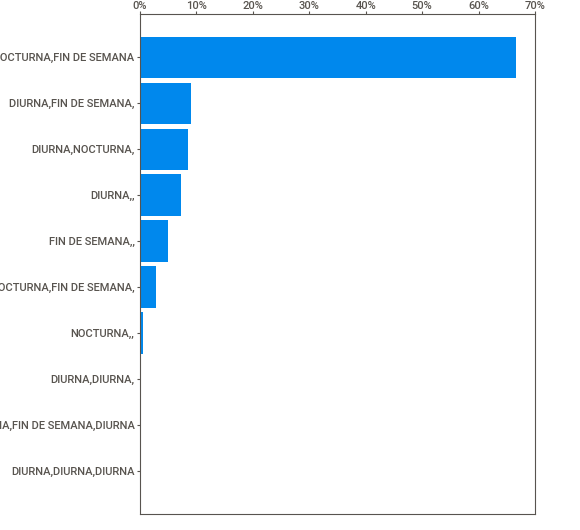
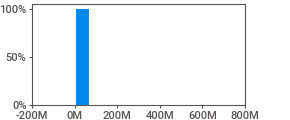
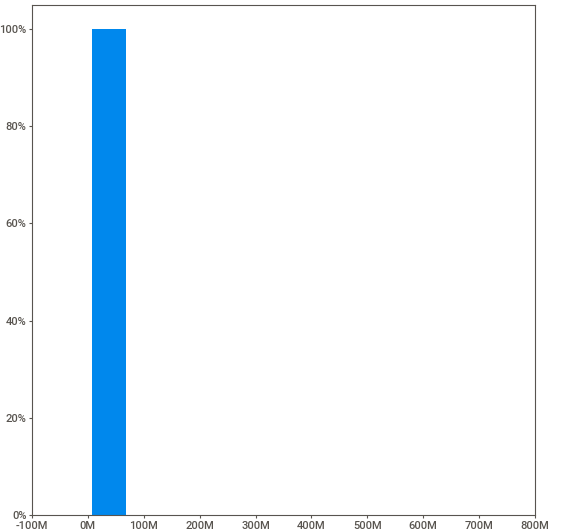
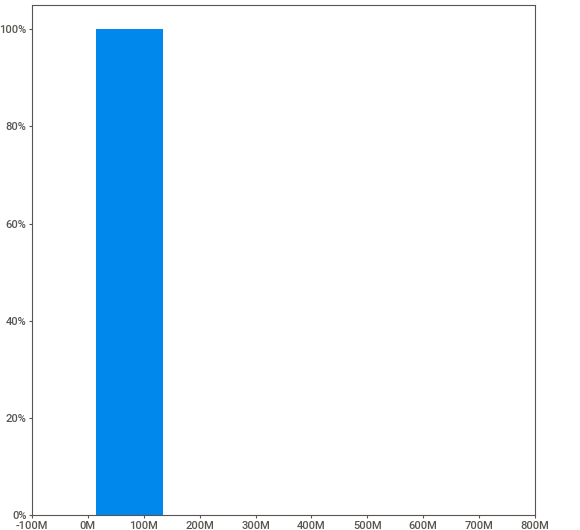
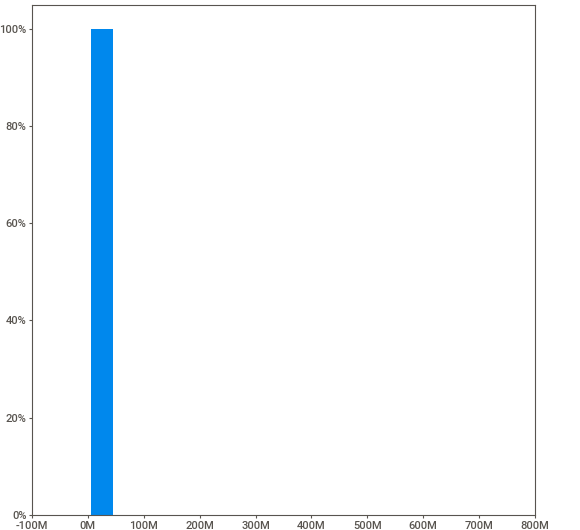
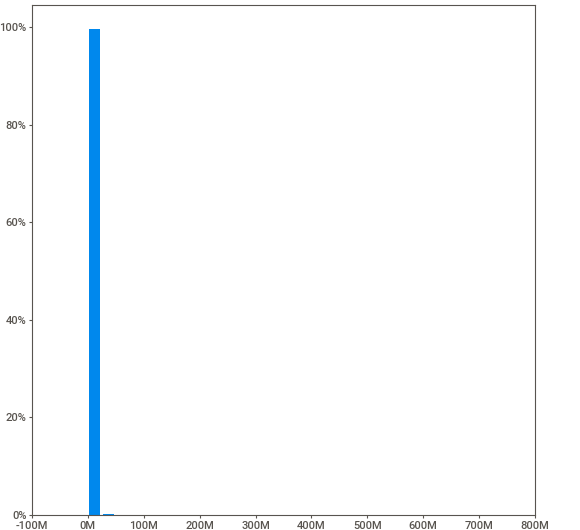
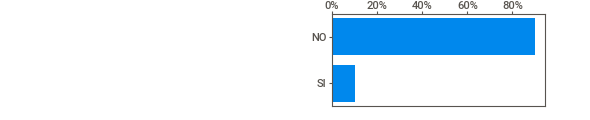
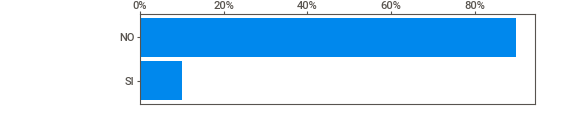
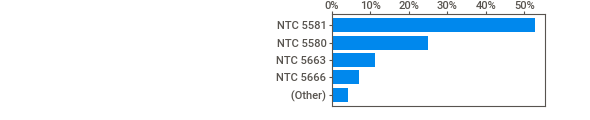
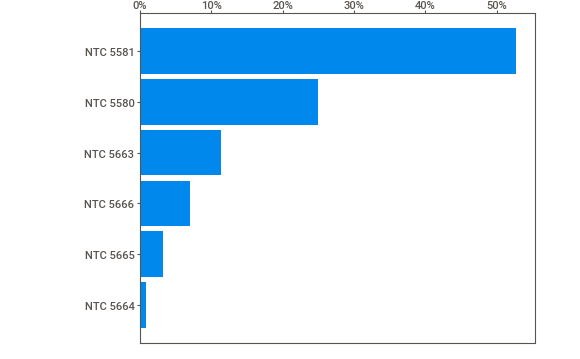
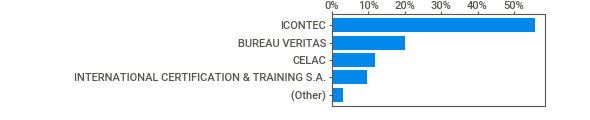
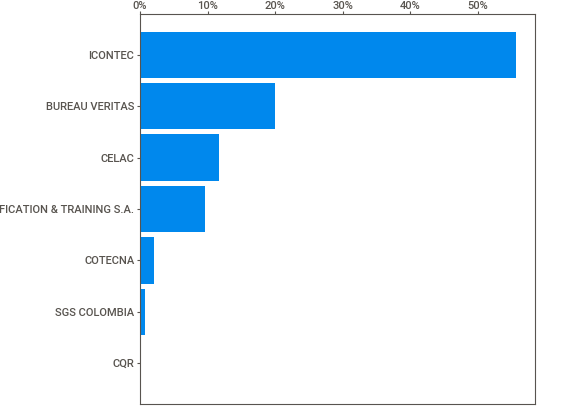
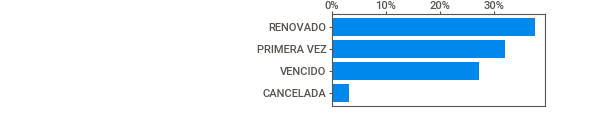
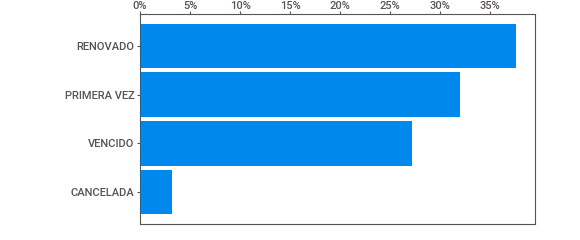
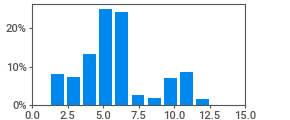
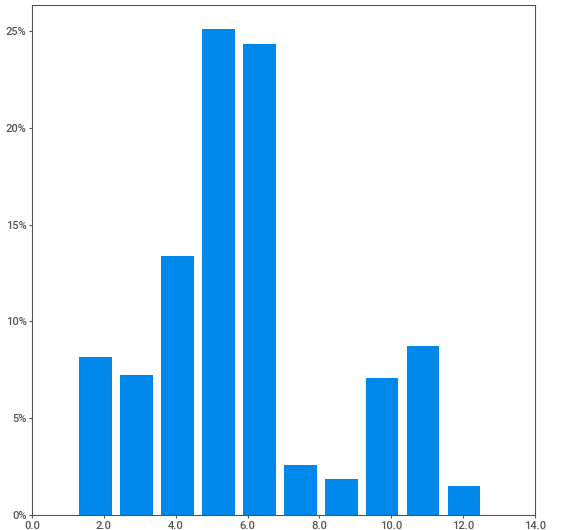
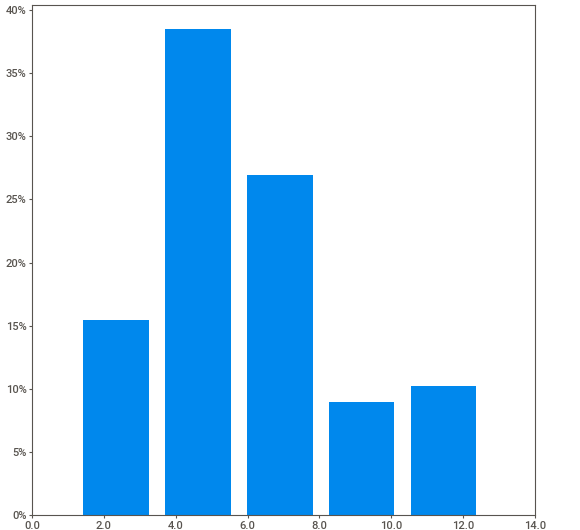
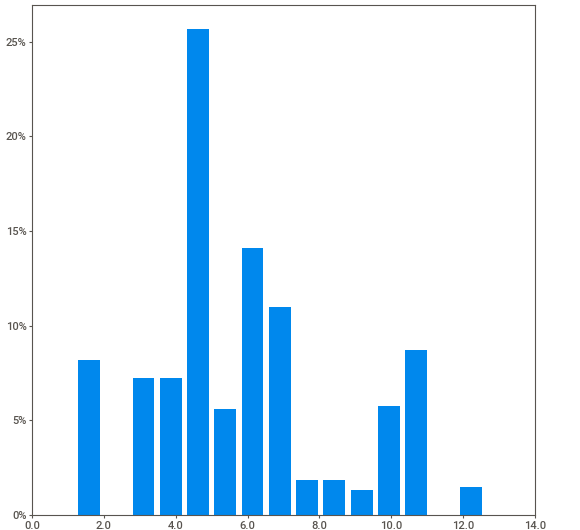
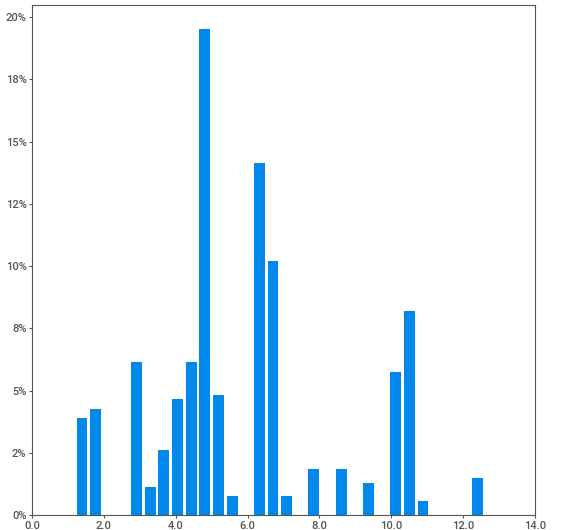
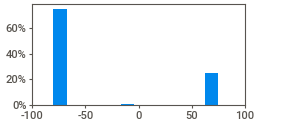
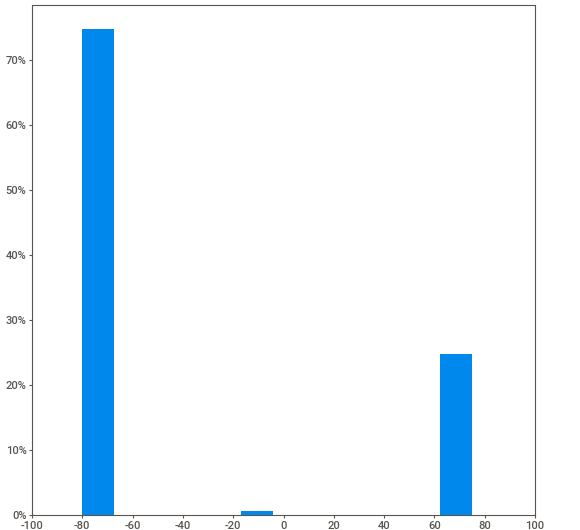
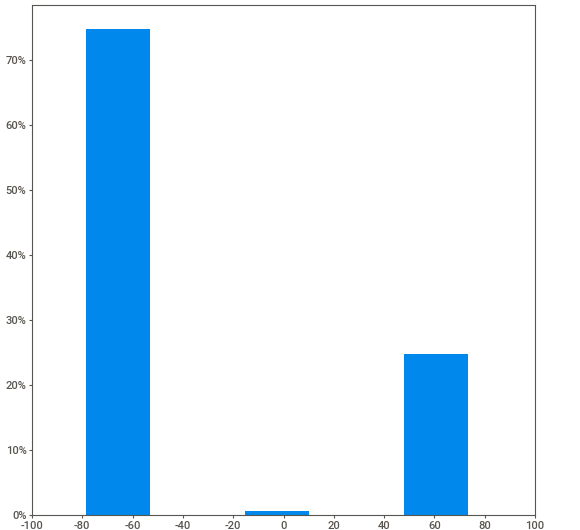
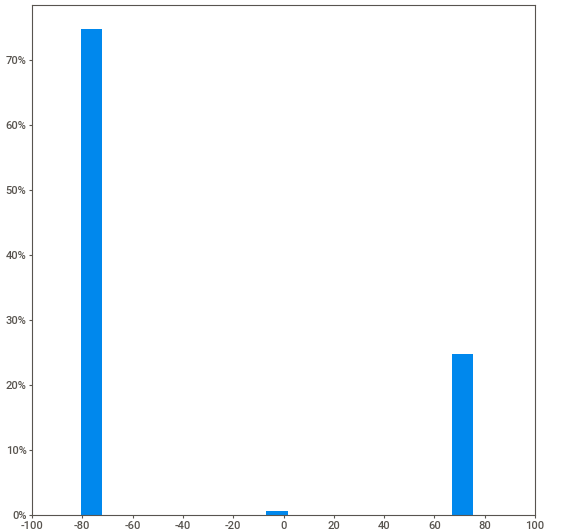
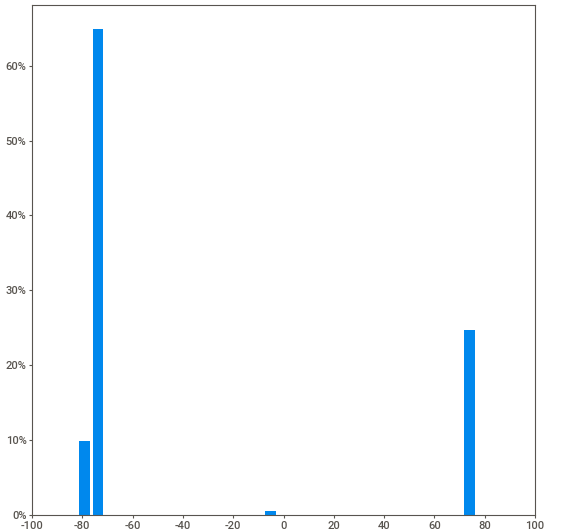
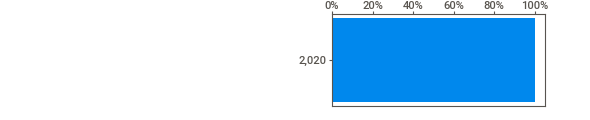
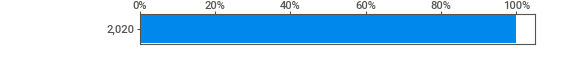
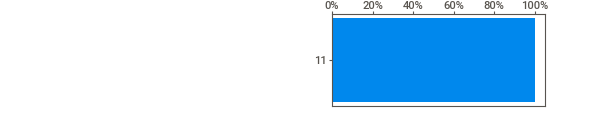
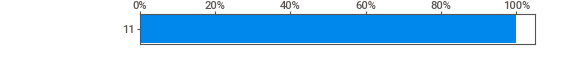
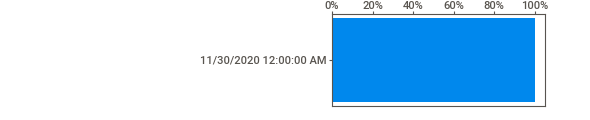
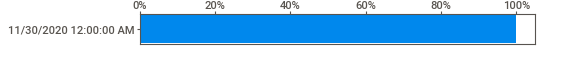
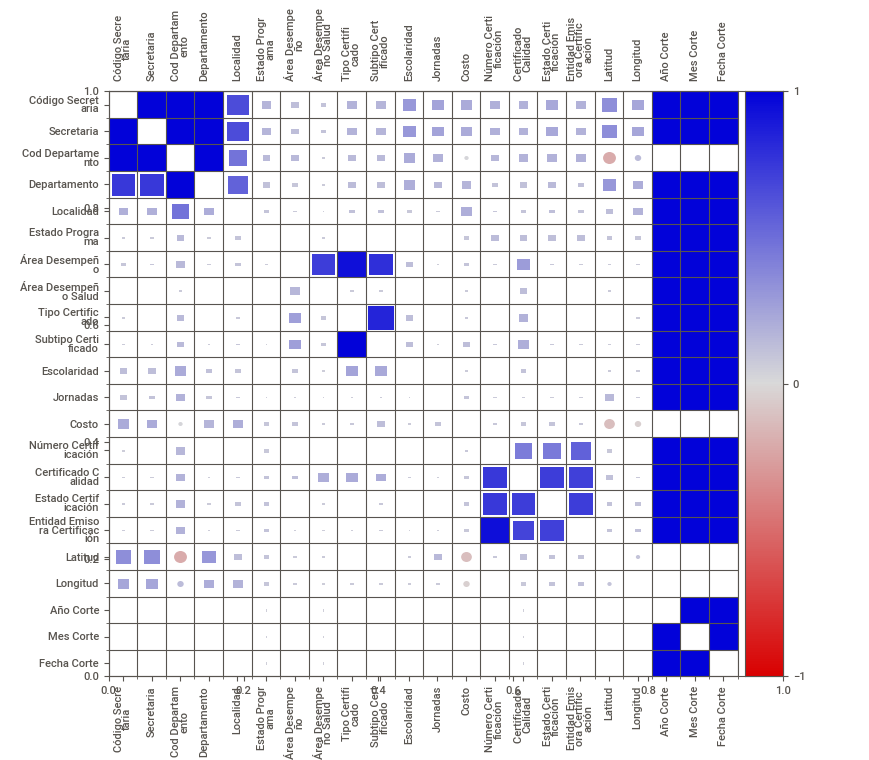
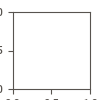

In [ ]:
#@title La función advert_report.show_notebook en Sweetviz muestra el reporte de análisis exploratorio de datos (EDA) en un notebook Jupyter.

# Parámetros:

# layout: ajusta el diseño ( 'widescreen' o 'full screen' )
# w y h: ajusta el ancho y alto en píxeles
# scale: ajusta el tamaño (0.9 = 90% de la resolución original)
advert_report.show_notebook(layout='widescreen', w=1500, h=500, scale=0.9)


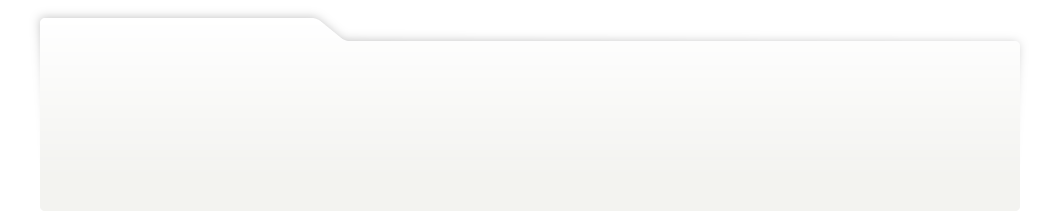
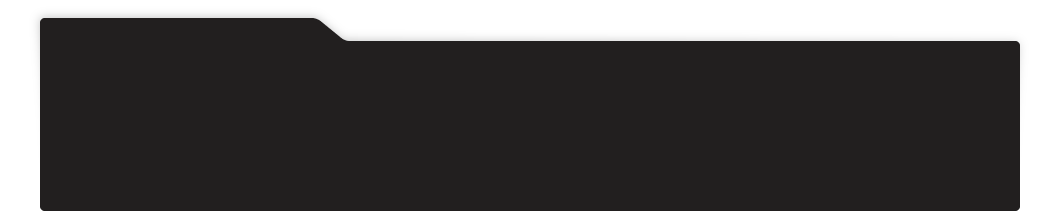
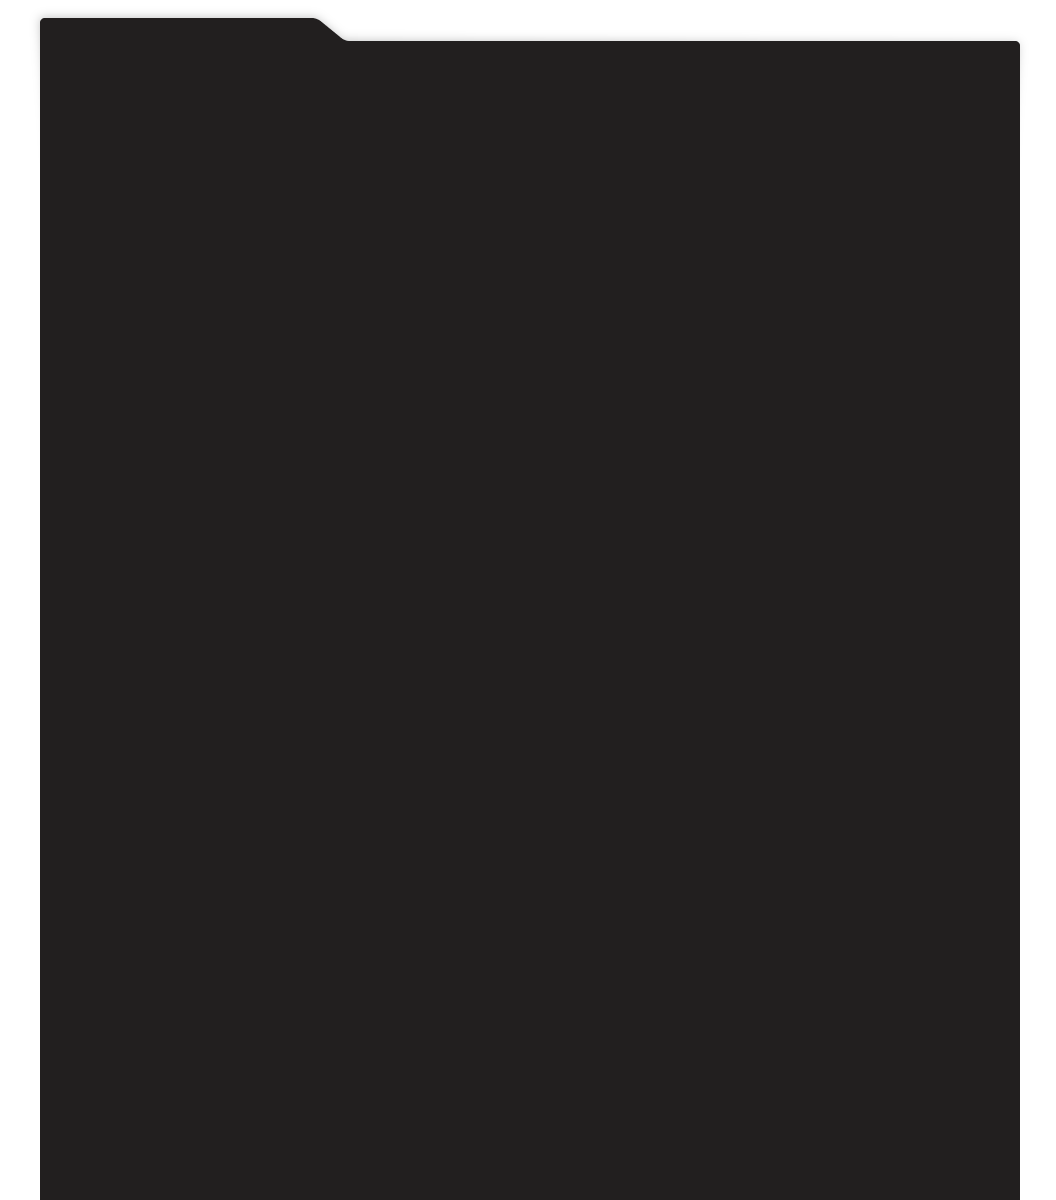
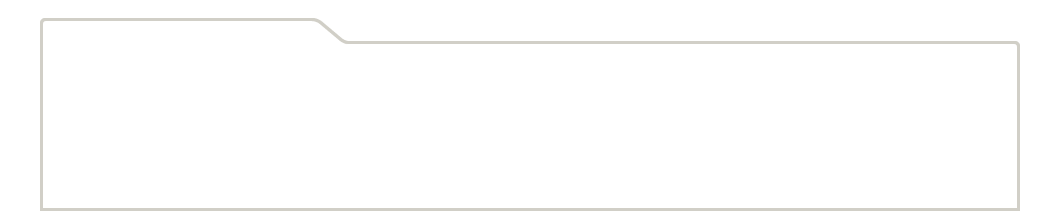
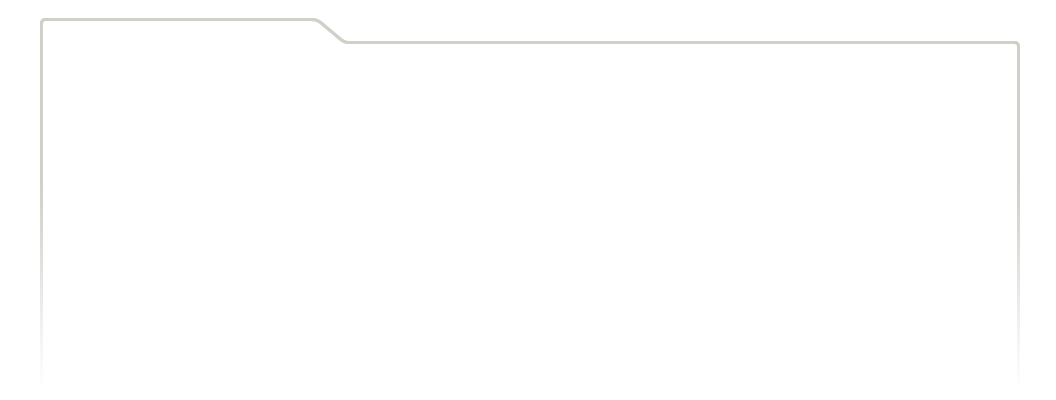
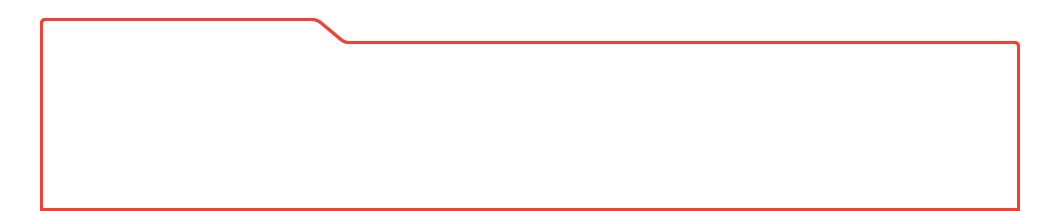
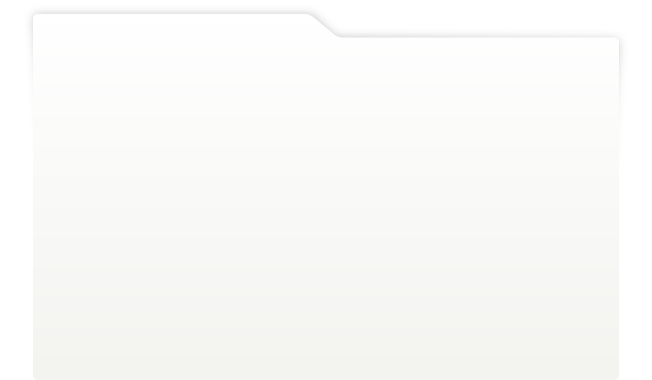
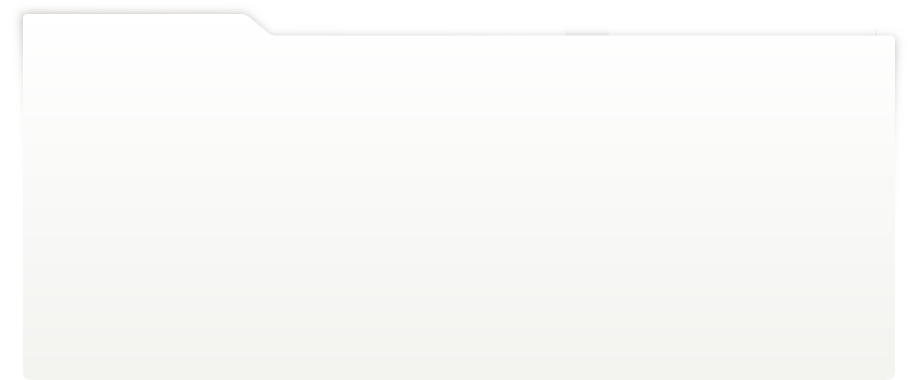
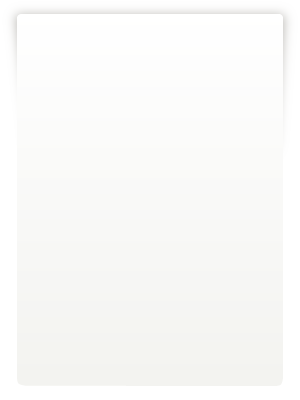
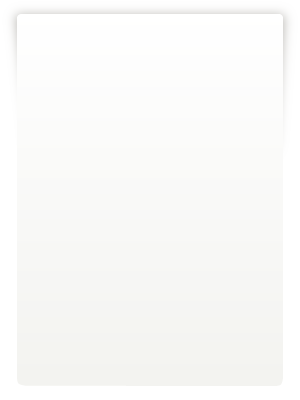
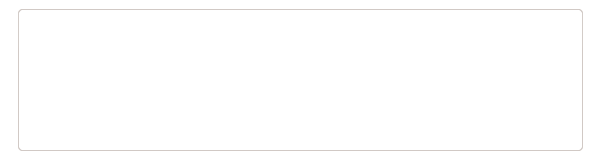
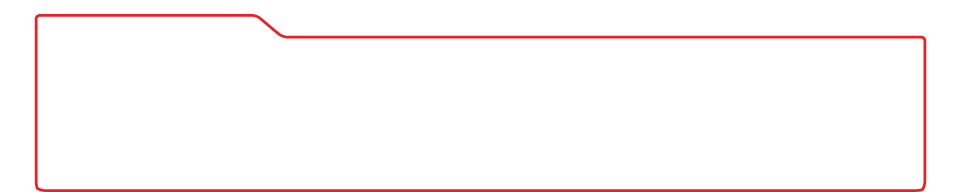
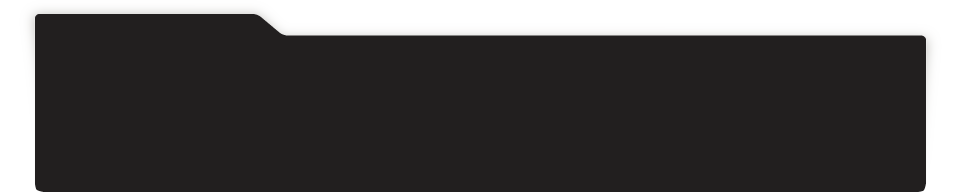
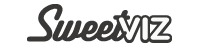
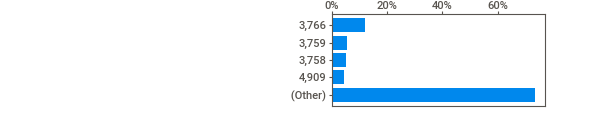
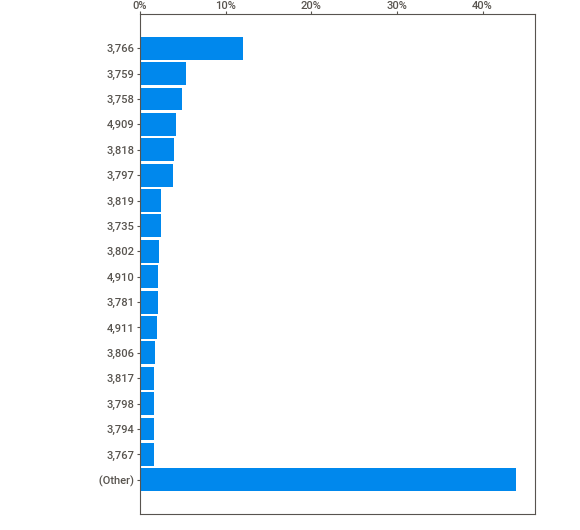
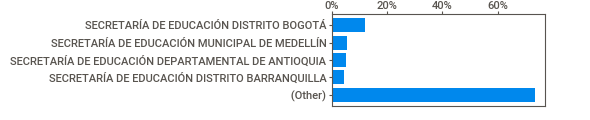
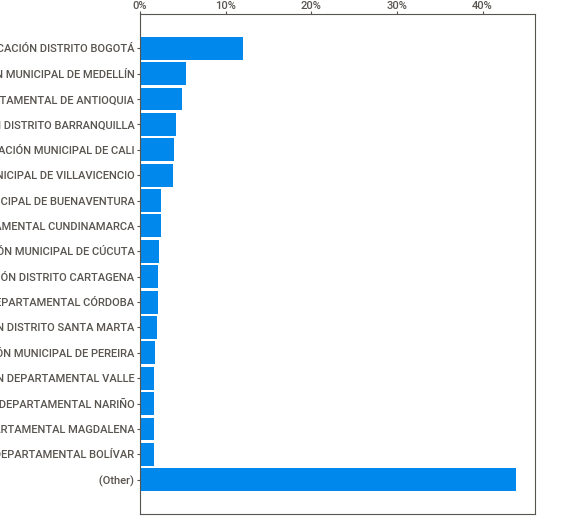
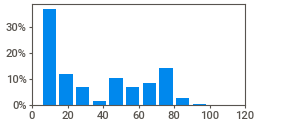
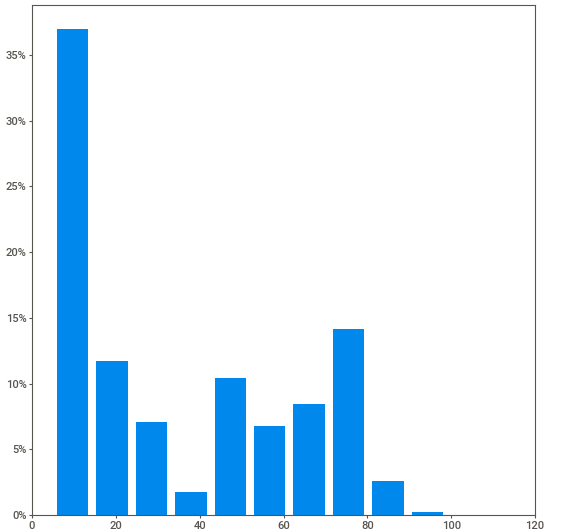
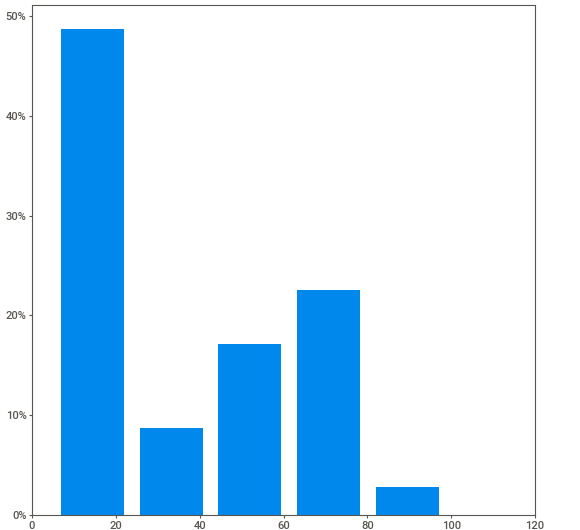
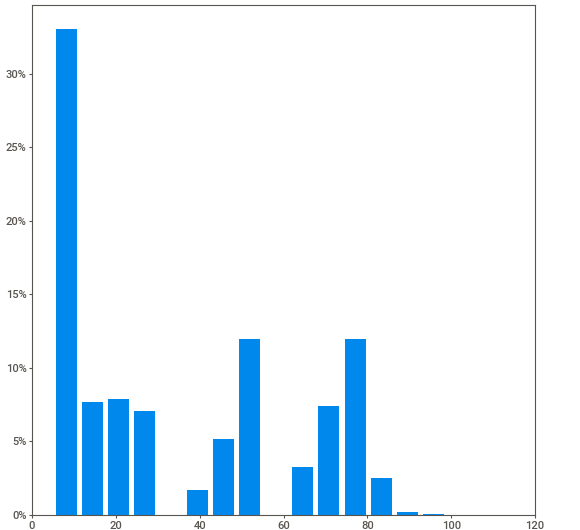
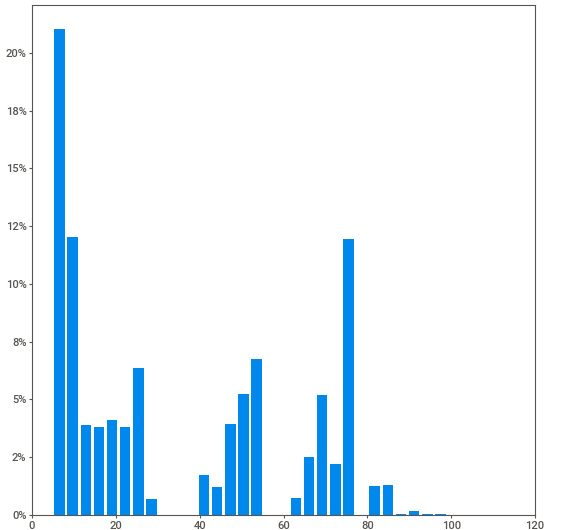
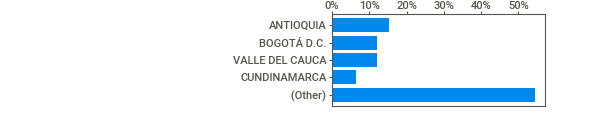
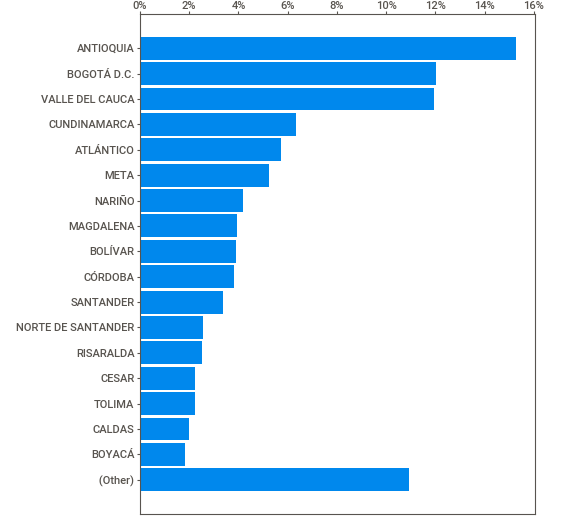
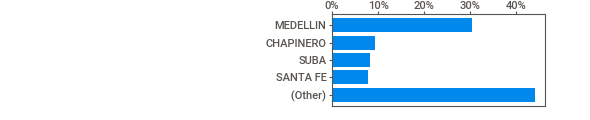
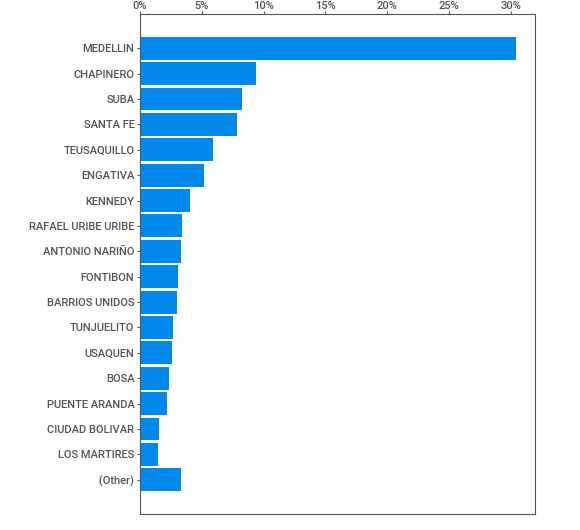
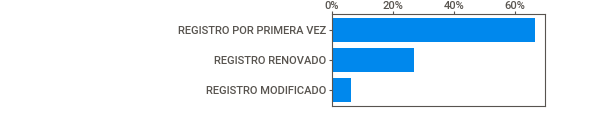
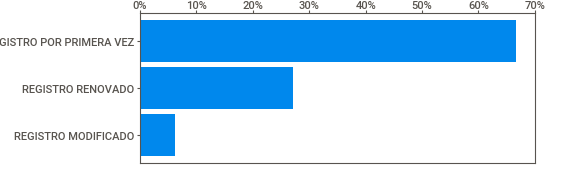
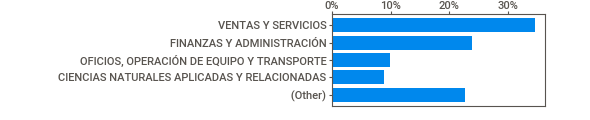
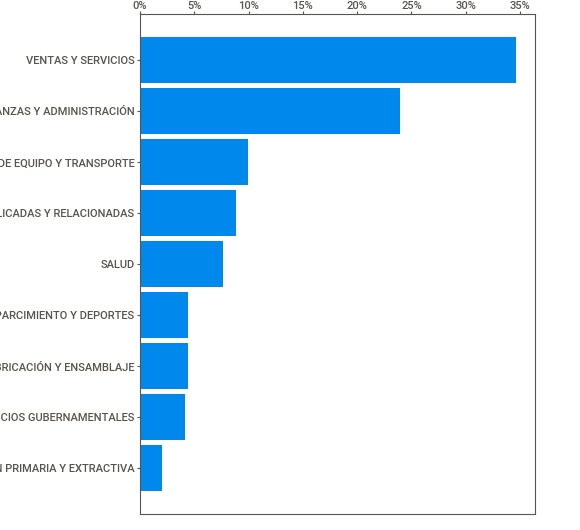
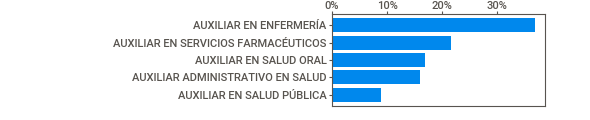
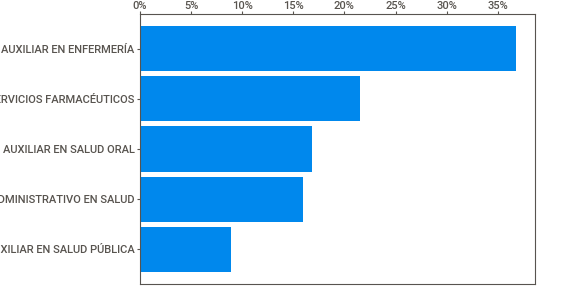
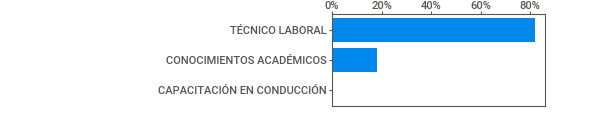
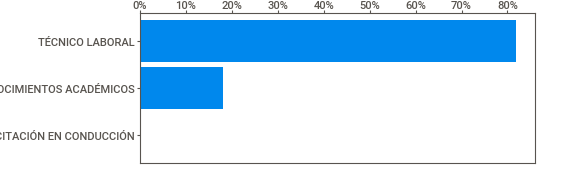
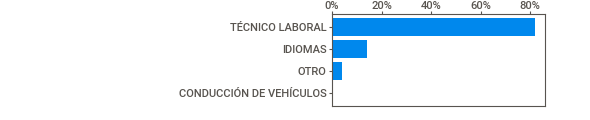
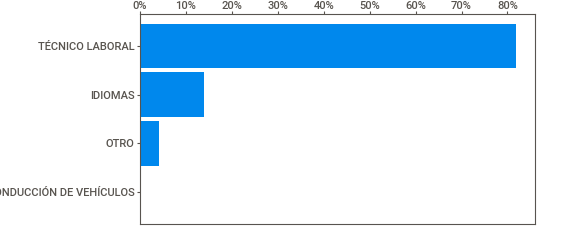
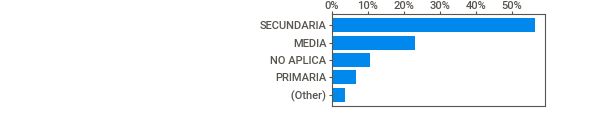
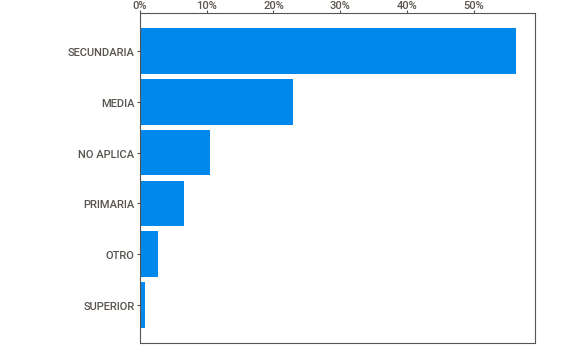
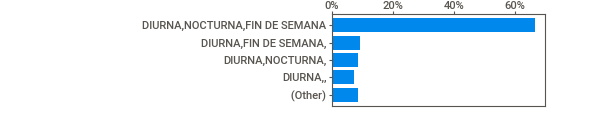
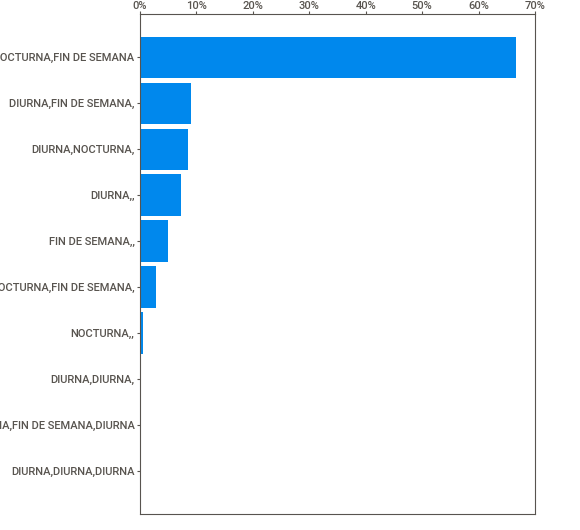
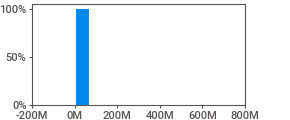
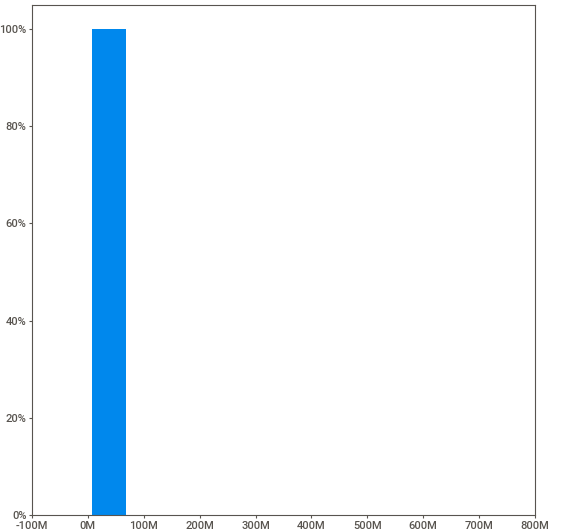
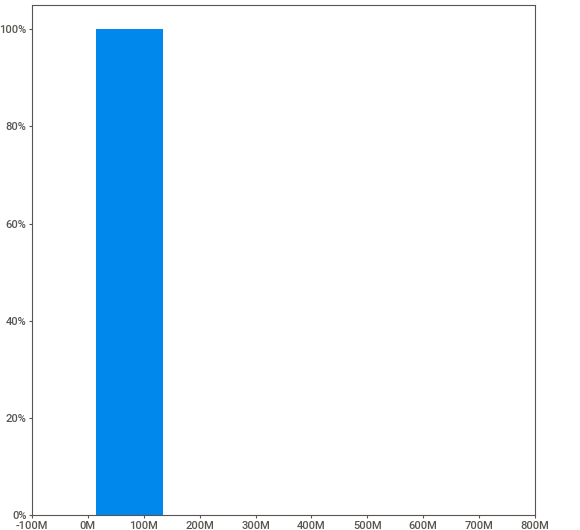
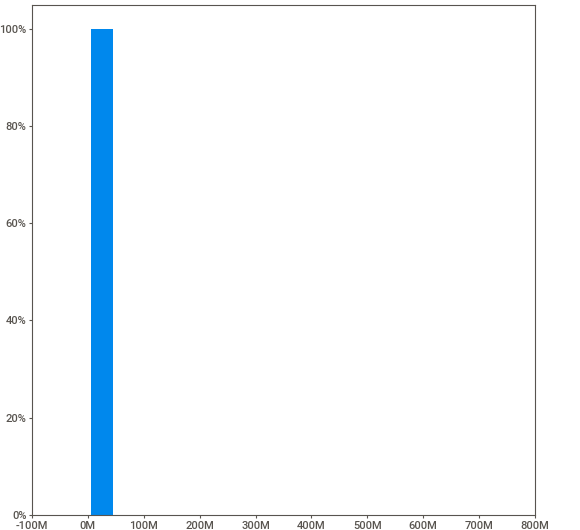
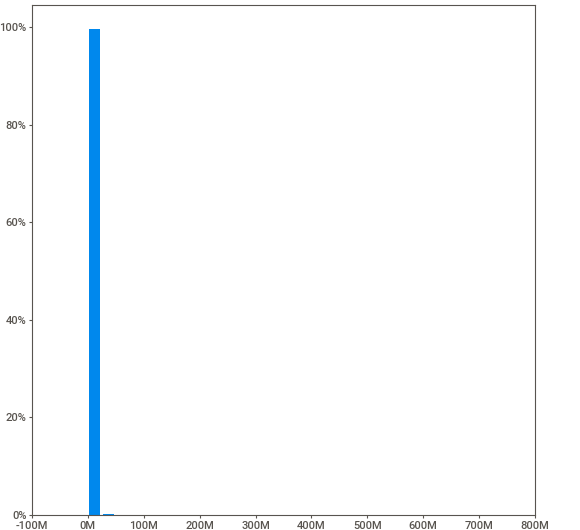
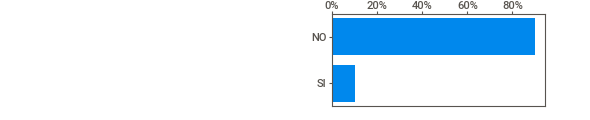
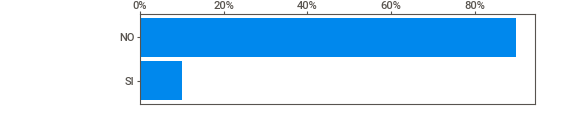
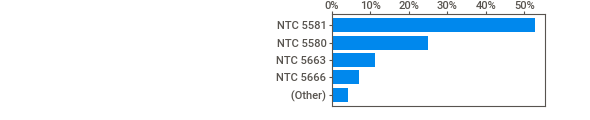
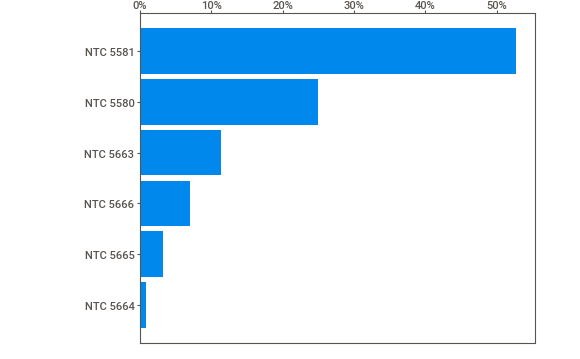
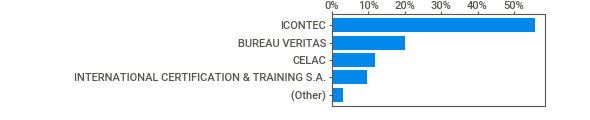
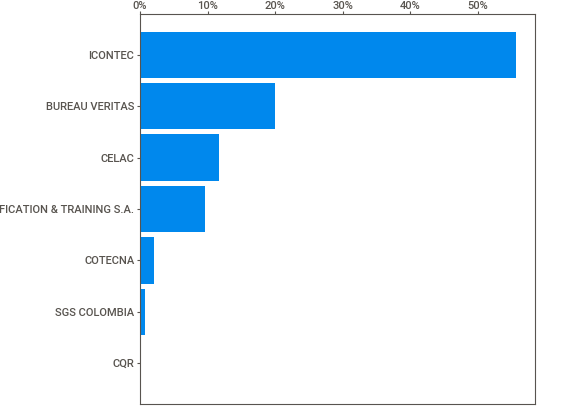
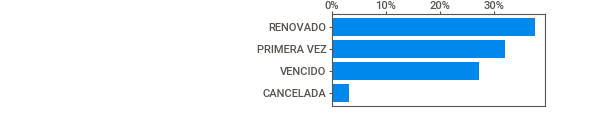
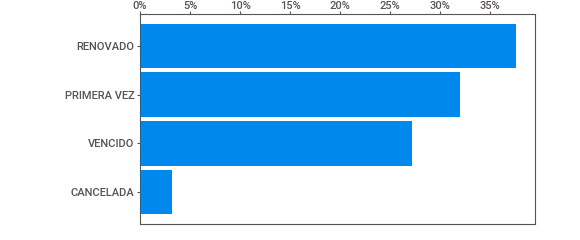
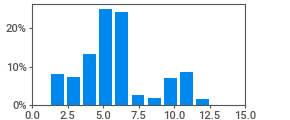
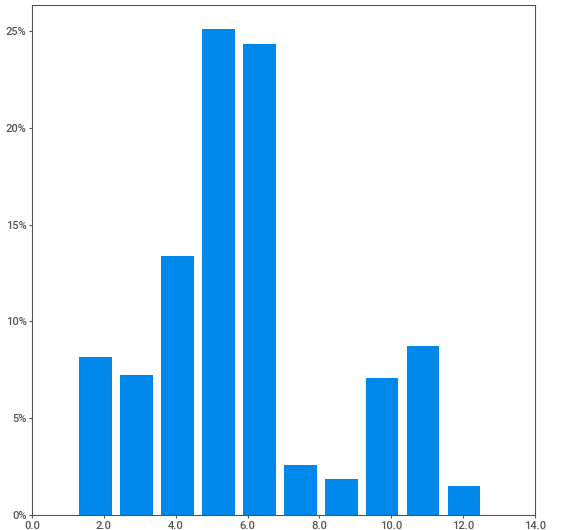
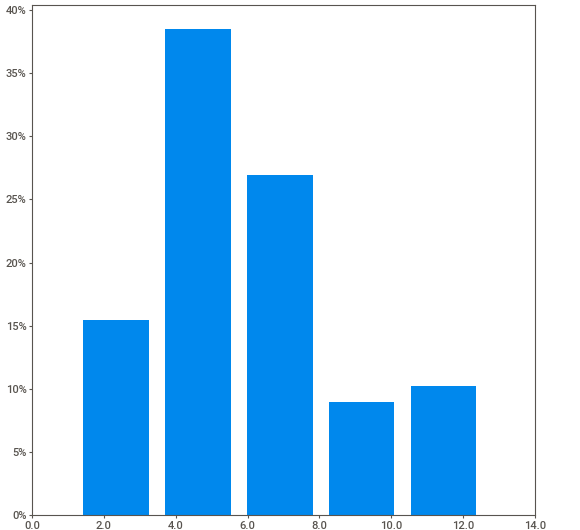
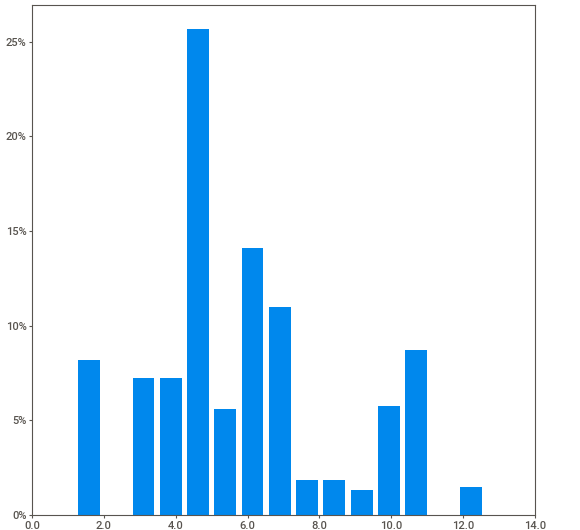
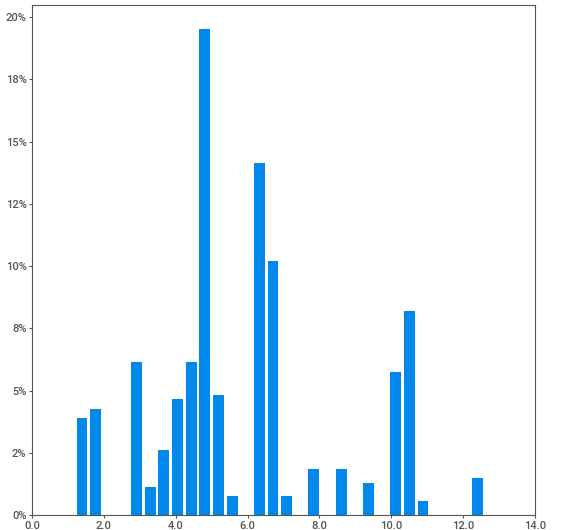
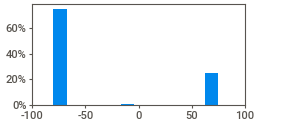
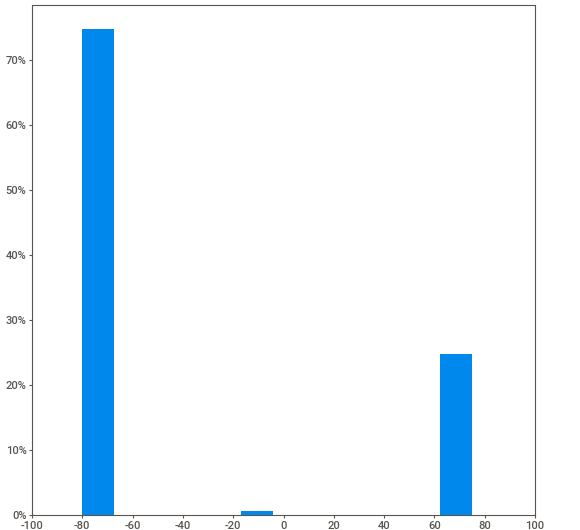
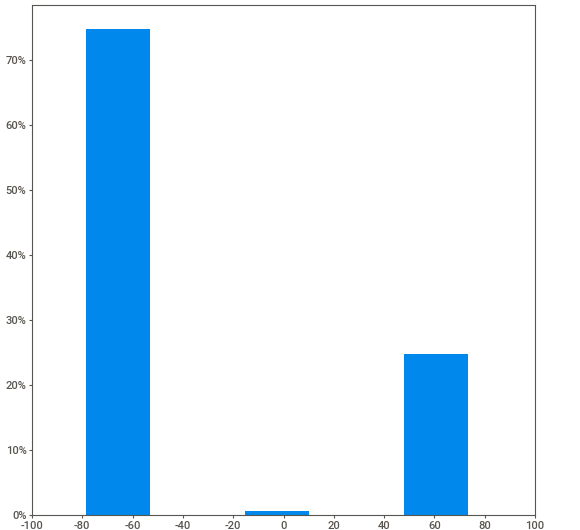
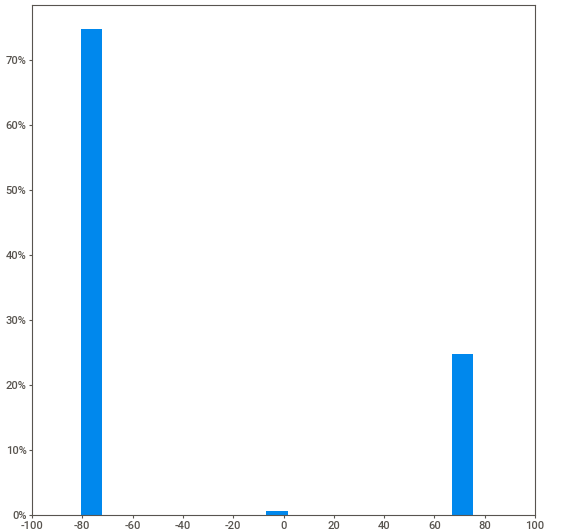
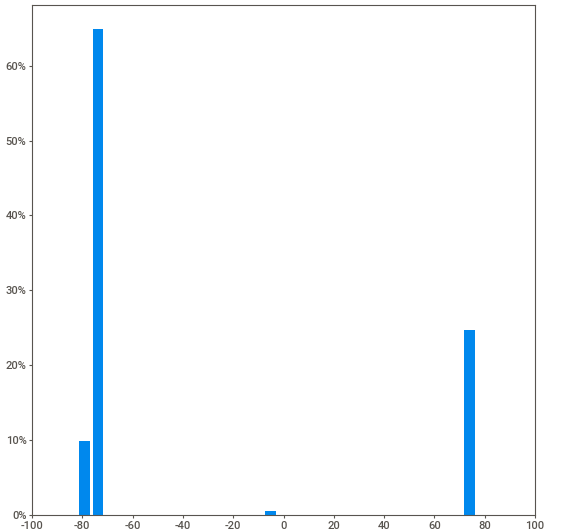
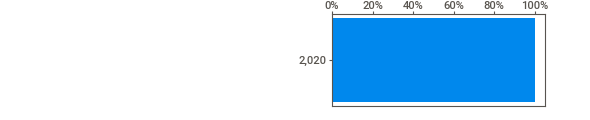
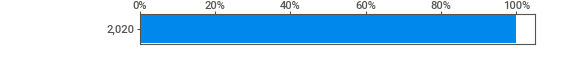
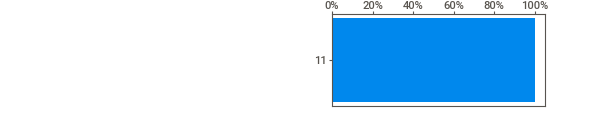
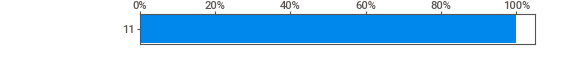
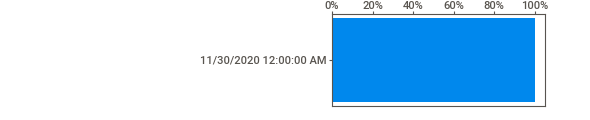
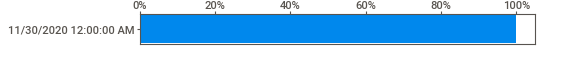
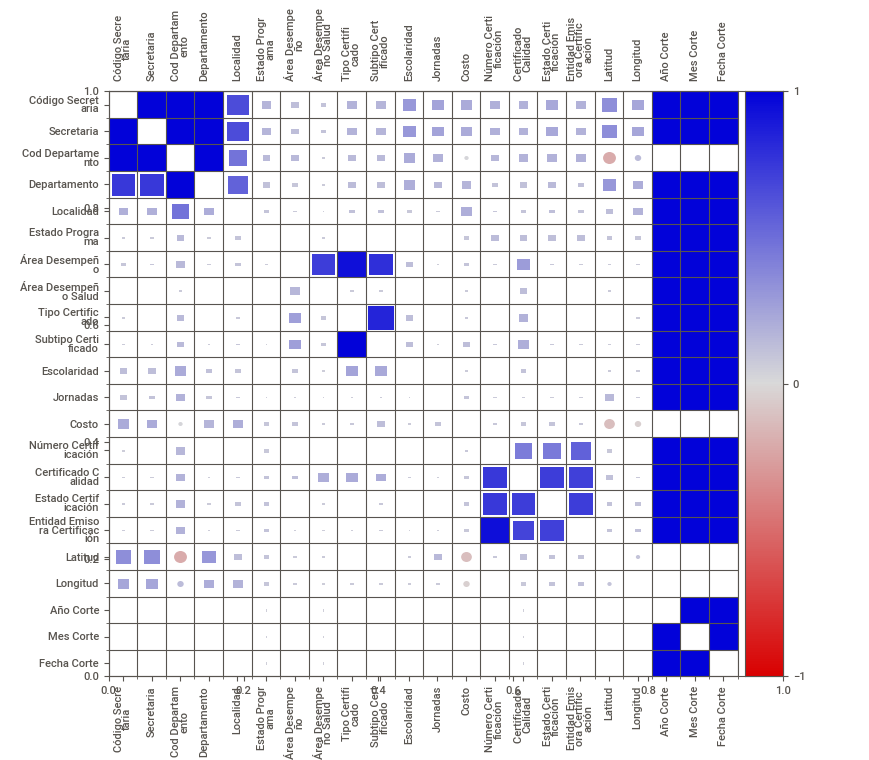
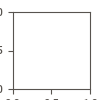

In [ ]:
#@title La función advert_report.show_notebook muestra el reporte de análisis exploratorio de datos (EDA) en un notebook Jupyter, con el siguiente formato:

# layout='vertical': muestra los datos en una columna vertical
# w=1400 y h=500: ajusta el ancho y alto del reporte a 1400x500 píxeles
# scale=0.9: muestra el reporte a un 90% de su tamaño original
advert_report.show_notebook(layout='vertical', w=1400, h=500, scale=0.9)

![](https://i.pinimg.com/originals/88/66/7e/88667eaf29f1bbf12d64abaaeae6caa2.gif)

# 3 Sección

In [ ]:
# prompt: necesito seleccionar solamente los registros que esten completos de la base de datos en df_trabajo_y_desarrollo

# Assuming 'df_trabajo_y_desarrollo' is your DataFrame

# Drop rows with any missing values
df_completo = df_trabajo_y_desarrollo.dropna()

# Print some info or display the resulting DataFrame
print(f"Shape of the complete DataFrame: {df_completo.shape}")
# Or display the first few rows
df_completo.head()


Shape of the complete DataFrame: (3, 36)


Código Secretaria                               Secretaria  \
1264              3,766  SECRETARÍA DE EDUCACIÓN DISTRITO BOGOTÁ   
10741             3,766  SECRETARÍA DE EDUCACIÓN DISTRITO BOGOTÁ   
14674             3,766  SECRETARÍA DE EDUCACIÓN DISTRITO BOGOTÁ   

      Código Institución                         Nombre Institución  \
1264                 117  INSTITUTO COLOMBIANO DE APRENDIZAJE INCAP   
10741                117  INSTITUTO COLOMBIANO DE APRENDIZAJE INCAP   
14674                117  INSTITUTO COLOMBIANO DE APRENDIZAJE INCAP   

      Código Programa                                    Nombre Programa  \
1264            5,107          TÉCNICO LABORAL EN AUXILIAR EN SALUD ORAL   
10741          15,117  TÉCNICO LABORAL EN AUXILIAR ADMINISTRATIVO EN ...   
14674          15,118          TÉCNICO LABORAL EN AUXILIAR DE ENFERMERIA   

       Cod Departamento Departamento Cod Municipio Municipio  ...  \
1264                 11  BOGOTÁ D.C.        11,001    BOGOTÁ  ...   
10741                11  BOGOTÁ D.C.        11,001    BOGOTÁ  ...   
14674                11  BOGOTÁ D.C.        11,001    BOGOTÁ  ...   

      Certificado Calidad Entidad Emisora Certificación Estado Certificación  \
1264             NTC 5663                       ICONTEC             RENOVADO   
10741            NTC 5663                       ICONTEC             RENOVADO   
14674            NTC 5663                       ICONTEC             RENOVADO   

           Fecha Otorgamiento       Fecha Vencimiento   Latitud  Longitud  \
1264   08/19/2016 12:00:00 AM  08/18/2022 12:00:00 AM  4.651476 -74.06398   
10741  08/19/2016 12:00:00 AM  08/18/2022 12:00:00 AM  4.651476 -74.06398   
14674  08/19/2016 12:00:00 AM  08/18/2022 12:00:00 AM  4.651476 -74.06398   

      Año Corte Mes Corte             Fecha Corte  
1264      2,020        11  11/30/2020 12:00:00 AM  
10741     2,020        11  11/30/2020 12:00:00 AM  
14674     2,020        11  11/30/2020 12:00:00 AM  

[3 rows x 36 columns]

In [ ]:
# prompt: necesito que me seleccione la base de datos que esta completa respecto a la columnas de 'Entidad Emisora Certificación', en la base de datos de df_trabajo_y_desarrollo

df_selected = df_trabajo_y_desarrollo[df_trabajo_y_desarrollo['Entidad Emisora Certificación'].notna()]

print(f"Shape of the selected DataFrame: {df_selected.shape}")
df_selected.head()


Shape of the selected DataFrame: (2853, 36)


Código Secretaria                                         Secretaria  \
23             3,799         SECRETARÍA DE EDUCACIÓN MUNICIPAL DE PASTO   
26             4,909      SECRETARÍA DE EDUCACIÓN DISTRITO BARRANQUILLA   
31             3,791         SECRETARÍA DE EDUCACIÓN MUNICIPAL DE NEIVA   
34             3,797  SECRETARÍA DE EDUCACIÓN MUNICIPAL DE VILLAVICE...   
37             3,802        SECRETARÍA DE EDUCACIÓN MUNICIPAL DE CÚCUTA   

   Código Institución                                 Nombre Institución  \
23              1,453  INSTITUTO PARA EL TRABAJO Y DESARROLLO HUMANO ...   
26                733  INSTITUTO TECNICO DE ADMINISTRACION Y SALUD  I...   
31                568                    INSTITUTO POLITECNICO AMERICANO   
34              8,282                     INSTITUTO DE IDIOMAS UNILLANOS   
37                709                       INSTITUTO TECNICO IMTEL LTDA   

   Código Programa                                    Nombre Programa  \
23          11,348         TECNICO LABORAL POR COMPETENCIAS EN COCINA   
26          15,953  TÉCNICO LABORAL EN ATENCION INTEGRAL A LA PRIM...   
31          11,094                                           SISTEMAS   
34          36,122  CONOCIMIENTOS ACADÉMICOS EN INGLÉS BREAKTHROUG...   
37           8,288     TÉCNICO LABORAL AUXILIAR CONTABLE Y FINANCIERO   

    Cod Departamento        Departamento Cod Municipio      Municipio  ...  \
23                52              NARIÑO        52,001          PASTO  ...   
26                 8           ATLÁNTICO         8,001   BARRANQUILLA  ...   
31                41               HUILA        41,001          NEIVA  ...   
34                50                META        50,001  VILLAVICENCIO  ...   
37                54  NORTE DE SANTANDER        54,001         CÚCUTA  ...   

   Certificado Calidad Entidad Emisora Certificación Estado Certificación  \
23            NTC 5581                BUREAU VERITAS              VENCIDO   
26            NTC 5581                       ICONTEC             RENOVADO   
31            NTC 5666                       ICONTEC             RENOVADO   
34            NTC 5580                         CELAC          PRIMERA VEZ   
37            NTC 5581                       ICONTEC              VENCIDO   

        Fecha Otorgamiento       Fecha Vencimiento Latitud Longitud Año Corte  \
23  10/31/2016 12:00:00 AM  10/30/2019 12:00:00 AM     NaN      NaN     2,020   
26  10/16/2013 12:00:00 AM  10/15/2022 12:00:00 AM     NaN      NaN     2,020   
31  01/11/2013 12:00:00 AM  01/10/2022 12:00:00 AM     NaN      NaN     2,020   
34  12/29/2018 12:00:00 AM  12/28/2021 12:00:00 AM     NaN      NaN     2,020   
37  04/07/2017 12:00:00 AM  04/06/2020 12:00:00 AM     NaN      NaN     2,020   

   Mes Corte             Fecha Corte  
23        11  11/30/2020 12:00:00 AM  
26        11  11/30/2020 12:00:00 AM  
31        11  11/30/2020 12:00:00 AM  
34        11  11/30/2020 12:00:00 AM  
37        11  11/30/2020 12:00:00 AM  

[5 rows x 36 columns]

In [ ]:
# @title Análisis exploratorio de datos (EDA)
#Configurar las opciones de visualizacion Sweetviz
sw.config_parser.read_string("""
                              [Output_Defaults]
                              html_layout = widescreen
                              html_scale = 1.0
                              notebook_layout = widescreen
                              notebook_scale = 0.9
                              notebook_width = 100%
                              notebook_height = 700
                              [Layout]
                              show_logo = 0
                              """)
nombre = 'Seleccionando Educación para el trabajo'
advert_report = sw.analyze([df_selected, nombre]) # Realizamos el análisis de la base de datos inicial

#@markdown Guardar y mostrar reporte formato HTML
advert_report.show_html('EDA_df_trabajo_y_desarrollo_seleccionado.html')

#@markdown Descarga y abre el reporte en una nueva pestaña del navegador
almacenar_archivo = input('Alamcenar archivo Si o No: ').title()
if almacenar_archivo == 'Si':
  files.download('/content/EDA_df_trabajo_y_desarrollo_seleccionado.html')

                                             |          | [  0%]   00:00 -> (? left)

Report EDA_df_trabajo_y_desarrollo_seleccionado.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
Alamcenar archivo Si o No: si


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_trabajo_y_desarrollo.isna().sum()

Código Secretaria                    0
Secretaria                           0
Código Institución                   0
Nombre Institución                   0
Código Programa                      0
Nombre Programa                      0
Cod Departamento                     0
Departamento                         0
Cod Municipio                        0
Municipio                            0
Localidad                        16423
Dirección                            0
Sede                                 0
Estado Programa                      0
Registro                             0
Fecha Registro                       0
Área Desempeño                    3727
Área Desempeño Salud             18628
Tipo Certificado                     0
Subtipo Certificado                  0
Escolaridad                          0
Jornadas                             0
Costo                                8
Duración Horas                       0
Número Certificación                 0
Tipo Certificación               17014
Certificado Calidad              17014
Entidad Emisora Certificación    17014
Estado Certificación             17065
Fecha Otorgamiento               17014
Fecha Vencimiento                17014
Latitud                          19329
Longitud                         19329
Año Corte                            0
Mes Corte                            0
Fecha Corte                          0
dtype: int64

In [ ]:
df_trabajo_y_desarrollo.shape

(19867, 36)

In [ ]:
# prompt: necesito quitar las columnas que tengan un porcentaje mayor o igual al 20% de vacios y almacenarla en una nueva variables de la base de datos en df_trabajo_y_desarrollo

# Calculate the threshold for missing values (20% of total rows)
threshold = 0.20 * len(df_trabajo_y_desarrollo)

# Identify columns with a high percentage of missing values
columns_to_drop = df_trabajo_y_desarrollo.columns[df_trabajo_y_desarrollo.isna().sum() >= threshold]

# Create a new DataFrame without the identified columns
df_trabajo_y_desarrollo_cleaned = df_trabajo_y_desarrollo.drop(columns=columns_to_drop)


In [ ]:
columns_to_drop

Index(['Localidad', 'Área Desempeño Salud', 'Tipo Certificación',
       'Certificado Calidad', 'Entidad Emisora Certificación',
       'Estado Certificación', 'Fecha Otorgamiento', 'Fecha Vencimiento',
       'Latitud', 'Longitud'],
      dtype='object')

In [ ]:
df_trabajo_y_desarrollo_cleaned.shape

(19867, 26)

In [ ]:
%pip install h2o
%pip install rdt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.8/265.8 MB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.46.0.6-py2.py3-none-any.whl size=265859786 sha256=0305c4b69b00ff74456e4dfd23c45a61ed5cc3b84e8fff14db71e76acf74358d
  Stored in directory: /root/.cache/pip/wheels/62/f9/aa/687bd54342d2981bc78e22ee9b9bc39f92006e344e7aa1e0ac
Successfully built h2o
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 69.9 MB/s eta 0:00:00


In [ ]:
# Importar librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import h2o
from h2o.estimators.kmeans import H2OKMeansEstimator
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from rdt import HyperTransformer

In [ ]:
df_trabajo_y_desarrollo_cleaned.columns

Index(['Código Secretaria', 'Secretaria', 'Código Institución',
       'Nombre Institución', 'Código Programa', 'Nombre Programa',
       'Cod Departamento', 'Departamento', 'Cod Municipio', 'Municipio',
       'Dirección', 'Sede', 'Estado Programa', 'Registro', 'Fecha Registro',
       'Área Desempeño', 'Tipo Certificado', 'Subtipo Certificado',
       'Escolaridad', 'Jornadas', 'Costo', 'Duración Horas',
       'Número Certificación', 'Año Corte', 'Mes Corte', 'Fecha Corte'],
      dtype='object')

Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         27 mins 45 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.6
H2O_cluster_version_age:    4 months and 9 days
H2O_cluster_name:           H2O_from_python_unknownUser_ufg6e0
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.154 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.11.11 final
--------------------------  -----------------------------------------------------------------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
kmeans Model Build progress: |

/usr/local/lib/python3.11/dist-packages/h2o/estimators/estimator_base.py:192: RuntimeWarning: Dropping bad and constant columns: [Mes Corte]
  warnings.warn(mesg["message"], RuntimeWarning)


███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


kmeans Model Build progress: |

/usr/local/lib/python3.11/dist-packages/h2o/estimators/estimator_base.py:192: RuntimeWarning: Dropping bad and constant columns: [Mes Corte]
  warnings.warn(mesg["message"], RuntimeWarning)


███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


kmeans Model Build progress: |

/usr/local/lib/python3.11/dist-packages/h2o/estimators/estimator_base.py:192: RuntimeWarning: Dropping bad and constant columns: [Mes Corte]
  warnings.warn(mesg["message"], RuntimeWarning)


███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


kmeans Model Build progress: |

/usr/local/lib/python3.11/dist-packages/h2o/estimators/estimator_base.py:192: RuntimeWarning: Dropping bad and constant columns: [Mes Corte]
  warnings.warn(mesg["message"], RuntimeWarning)


███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


kmeans Model Build progress: |

/usr/local/lib/python3.11/dist-packages/h2o/estimators/estimator_base.py:192: RuntimeWarning: Dropping bad and constant columns: [Mes Corte]
  warnings.warn(mesg["message"], RuntimeWarning)


███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


kmeans Model Build progress: |

/usr/local/lib/python3.11/dist-packages/h2o/estimators/estimator_base.py:192: RuntimeWarning: Dropping bad and constant columns: [Mes Corte]
  warnings.warn(mesg["message"], RuntimeWarning)


███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


kmeans Model Build progress: |

/usr/local/lib/python3.11/dist-packages/h2o/estimators/estimator_base.py:192: RuntimeWarning: Dropping bad and constant columns: [Mes Corte]
  warnings.warn(mesg["message"], RuntimeWarning)


███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


kmeans Model Build progress: |

/usr/local/lib/python3.11/dist-packages/h2o/estimators/estimator_base.py:192: RuntimeWarning: Dropping bad and constant columns: [Mes Corte]
  warnings.warn(mesg["message"], RuntimeWarning)


███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


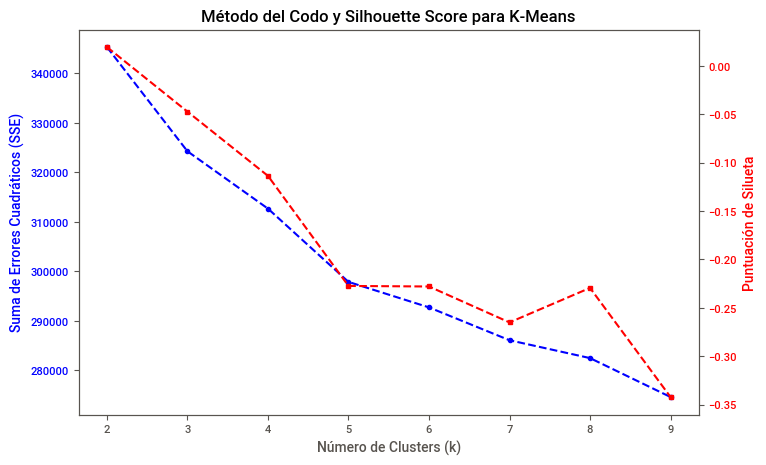

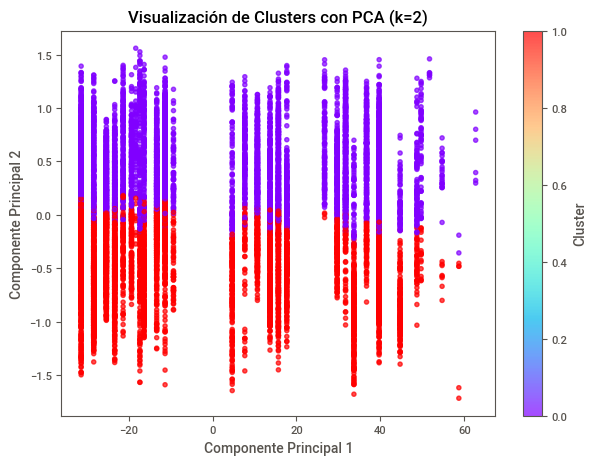

In [ ]:
# 🔹 Inicializar H2O
h2o.init()

# 1️⃣ Cargar el dataset de df_trabajo_y_desarrollo

df = df_trabajo_y_desarrollo_cleaned.copy()

# 2️⃣ Seleccionar algunas columnas para la prueba
df = df.dropna()  # Eliminar nulos
df = df.drop(columns='Costo')

# 3️⃣ Aplicar transformación con RDT 🚀
ht = HyperTransformer()
ht.detect_initial_config(df)
ht.fit(df)
df_transformed = ht.transform(df)
df_transformed = pd.DataFrame(df_transformed, columns=df.columns)

# 4️⃣ Convertir a H2OFrame 📄
df_h2o = h2o.H2OFrame(df_transformed)

# 5️⃣ Aplicar PCA y reducir a 2 dimensiones
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_transformed)

# 6️⃣ Definir valores de K a probar
k_values = range(2, 10)
sse_values = []
silhouette_values = []
cluster_results = {}

for k in k_values:
    # 🔹 Definir y entrenar K-Means en H2O
    kmeans = H2OKMeansEstimator(k=k)
    kmeans.train(x=df_h2o.columns, training_frame=df_h2o)

    # 🔹 Obtener SSE
    sse_values.append(kmeans.tot_withinss())

    # 🔹 Obtener etiquetas de clusters y calcular la silueta
    cluster_assignments = kmeans.predict(df_h2o)
    labels = h2o.as_list(cluster_assignments).values.flatten()

    # silhouette
    silhouette_avg = silhouette_score(df_pca, labels)  # Calcular silhouette
    silhouette_values.append(silhouette_avg)

    # Guardar resultados para visualización
    cluster_results[k] = labels

# 🔹 Graficar Método del Codo y Silhouette Score
fig, ax1 = plt.subplots(figsize=(8, 5))

ax1.plot(k_values, sse_values, marker='o', linestyle='--', color='b', label='SSE')
ax1.set_xlabel('Número de Clusters (k)')
ax1.set_ylabel('Suma de Errores Cuadráticos (SSE)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(k_values, silhouette_values, marker='s', linestyle='--', color='r', label='Silhouette Score')
ax2.set_ylabel('Puntuación de Silueta', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Método del Codo y Silhouette Score para K-Means')
plt.show()

# 🔹 Visualización de los Clusters en 2D (PCA)
best_k = max(cluster_results, key=lambda k: silhouette_values[k_values.index(k)])  # k con mejor silhouette
best_labels = cluster_results[best_k]

plt.figure(figsize=(7, 5))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=best_labels, cmap='rainbow', alpha=0.7)
plt.title(f'Visualización de Clusters con PCA (k={best_k})')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
best_labels

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
df.shape #[]

(16133, 26)

In [ ]:
df[best_labels==0].shape

(16132, 26)

In [ ]:
df[best_labels==1]

Costo  Cod Departamento Cod Municipio
18899  167400000.0                 5         5,001

In [ ]:
df = df.drop(index=2868)
df.shape

(16132, 26)

In [ ]:
# prompt: necesito que me ordenes las características con mayor relevancia luego de realizar lo siguiente:
# pca = PCA(n_components=2)
# df_pca = pca.fit_transform(df_transformed)

import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming 'healthy_life_df_columnas_seleccionadas' is your DataFrame
# and it has been preprocessed as shown in the code.
# 1️⃣ Cargar el dataset de df_trabajo_y_desarrollo
df = df_trabajo_y_desarrollo_cleaned.copy()

# 2️⃣ Seleccionar algunas columnas para la prueba
df = df.dropna()  # Eliminar nulos
df = df.drop(index=2868)

# 3️⃣ Aplicar transformación con RDT 🚀
ht = HyperTransformer()
ht.detect_initial_config(df)
ht.fit(df)
df_transformed = ht.transform(df)
df_transformed = pd.DataFrame(df_transformed, columns=df.columns)

df_scaled = df_transformed.copy()

# Apply PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Get explained variance ratios
explained_variance_ratio = pca.explained_variance_ratio_

# Create a DataFrame with feature importance based on explained variance
feature_importance = pd.DataFrame({'feature': df.columns,
                                    'importance': abs(pca.components_[0])}) # Use absolute value for ranking

# Sort by importance in descending order
feature_importance = feature_importance.sort_values('importance', ascending=False)


print("Feature Importance after PCA:")
print(feature_importance)

#Now you have feature_importance sorted, so you can access the features in order of importance:
most_important_features = feature_importance["feature"].to_list()
print("\nMost important features (ordered):", most_important_features)


Feature Importance after PCA:
                 feature    importance
20                 Costo  1.000000e+00
6       Cod Departamento  2.265964e-07
8          Cod Municipio  1.130918e-08
9              Municipio  1.119870e-08
11                  Sede  6.740514e-09
22  Número Certificación  5.616892e-09
19              Jornadas  3.801248e-09
7           Departamento  3.113689e-09
10             Dirección  3.000087e-09
5        Nombre Programa  2.172914e-09
12       Estado Programa  1.447325e-09
13              Registro  1.267954e-09
16      Tipo Certificado  1.262691e-09
15        Área Desempeño  1.184700e-09
18           Escolaridad  1.110559e-09
3     Nombre Institución  1.049536e-09
23             Año Corte  9.770682e-10
21        Duración Horas  8.136290e-10
2     Código Institución  6.840492e-10
4        Código Programa  6.370278e-10
1             Secretaria  5.700922e-10
0      Código Secretaria  5.294887e-10
14        Fecha Registro  3.982791e-10
25           Fecha Corte  1.391969

In [ ]:
df[best_labels==0].shape

(8291, 25)

In [ ]:
df[best_labels==1].shape


(7842, 25)

In [ ]:
df.index

Index([    4,     5,     6,     8,    10,    11,    13,    15,    16,    17,
       ...
       19857, 19858, 19859, 19860, 19861, 19862, 19863, 19864, 19865, 19866],
      dtype='int64', length=16133)

In [ ]:
df_trabajo_y_desarrollo.iloc[df.index][best_labels==0]

Código Secretaria                                         Secretaria  \
627               3,795       SECRETARÍA DE EDUCACIÓN MUNICIPAL DE CIÉNAGA   
748               3,771       SECRETARÍA DE EDUCACIÓN MUNICIPAL DE DUITAMA   
765               3,804       SECRETARÍA DE EDUCACIÓN MUNICIPAL DE ARMENIA   
833               3,826     SECRETARÍA DE EDUCACIÓN DEPARTAMENTAL PUTUMAYO   
841               4,436      SECRETARÍA DE EDUCACIÓN MUNICIPAL DE PITALITO   
...                 ...                                                ...   
19859             3,819  SECRETARÍA DE EDUCACIÓN MUNICIPAL DE BUENAVENTURA   
19860             3,817        SECRETARÍA DE EDUCACIÓN DEPARTAMENTAL VALLE   
19862             3,768      SECRETARÍA DE EDUCACIÓN MUNICIPAL DE MAGANGUÉ   
19864             3,795       SECRETARÍA DE EDUCACIÓN MUNICIPAL DE CIÉNAGA   
19865             3,783        SECRETARÍA DE EDUCACIÓN MUNICIPAL DE LORICA   

      Código Institución                                 Nombre Institución  \
627                4,691          CORPORACION EDUCATIVA ASESORIAS DEL NORTE   
748                7,020                         INSTITUTO FRANCISCO GALTON   
765                6,189  CENTRO COLOMBIANO DE CAPACITACION LABORAL  "CE...   
833                9,308       Instituto Tecnológico del Putumayo ITP Colon   
841                4,651  CENTRO DE ENSEÑANZA PETROLERA Y MEDIO AMBIENTE...   
...                  ...                                                ...   
19859              7,578  CORPORACIÓN UNIVERSITARIA LIBERTADOR SIMÓN BOL...   
19860              6,727                   PREPARATORIA BILINGUE  BI-COLL'S   
19862              1,804                    INSTITUTO DE SISTEMAS PROGRAMAR   
19864              5,152  CORPORACION NACIONAL DE ESTUDIOS TECNICOS OCUP...   
19865              5,650                                      COMPUSYSTEMAS   

      Código Programa                                    Nombre Programa  \
627            37,758  TÉCNICO LABORAL POR COMPETENCIAS EN MANTENIEMI...   
748            20,147  TÉCNICO LABORAL EN SEGURIDAD DE EXTRACCIÓN MIN...   
765             6,245                  PREPARACION Y RECUPERACION FISICA   
833            44,973  TÉCNICO LABORAL EN AUXILIAR DE SERVICIOS HOTEL...   
841            11,693    TÉCNICO LABORAL EN MANEJO DEL SISTEMA AMBIENTAL   
...               ...                                                ...   
19859          31,521  TÉCNICO LABORAL EN SERVICIOS CONTABLES Y FINAN...   
19860          40,527  TÉCNICO LABORAL CERTIFICADO EN CONOCIMIENTOS A...   
19862          43,829  TÉCNICO LABORAL EN AUXILIAR DE INSTALACIÓN, MA...   
19864          13,817  TÉCNICO LABORAL POR COMPETENCIAS EN AGENTE POR...   
19865          42,268                 TÉCNICO LABORAL EN MECÁNICA DIÉSEL   

       Cod Departamento     Departamento Cod Municipio     Municipio  ...  \
627                  47        MAGDALENA        47,189       CIÉNAGA  ...   
748                  15           BOYACÁ        15,238       DUITAMA  ...   
765                  63          QUINDÍO        63,001       ARMENIA  ...   
833                  86         PUTUMAYO        86,219         COLÓN  ...   
841                  41            HUILA        41,551      PITALITO  ...   
...                 ...              ...           ...           ...  ...   
19859                76  VALLE DEL CAUCA        76,109  BUENAVENTURA  ...   
19860                76  VALLE DEL CAUCA        76,622    ROLDANILLO  ...   
19862                13          BOLÍVAR        13,430      MAGANGUÉ  ...   
19864                47        MAGDALENA        47,189       CIÉNAGA  ...   
19865                23          CÓRDOBA        23,417        LORICA  ...   

      Certificado Calidad Entidad Emisora Certificación Estado Certificación  \
627                   NaN                           NaN                  NaN   
748                   NaN                           NaN                  NaN   
765                   NaN                 

In [ ]:
df_trabajo_y_desarrollo.iloc[df.index][best_labels==1]

Código Secretaria                                         Secretaria  \
4                 3,788        SECRETARÍA DE EDUCACIÓN MUNICIPAL DE SOACHA   
5                 3,830     SECRETARÍA DE EDUCACIÓN DEPARTAMENTAL GUAVIARE   
6                 3,778       SECRETARÍA DE EDUCACIÓN MUNICIPAL DE POPAYÁN   
8                 3,791         SECRETARÍA DE EDUCACIÓN MUNICIPAL DE NEIVA   
10                3,814     SECRETARÍA DE EDUCACIÓN MUNICIPAL DE SINCELEJO   
...                 ...                                                ...   
19856             4,909      SECRETARÍA DE EDUCACIÓN DISTRITO BARRANQUILLA   
19858             3,778       SECRETARÍA DE EDUCACIÓN MUNICIPAL DE POPAYÁN   
19861             3,797  SECRETARÍA DE EDUCACIÓN MUNICIPAL DE VILLAVICE...   
19863             3,780    SECRETARÍA DE EDUCACIÓN MUNICIPAL DE VALLEDUPAR   
19866             4,909      SECRETARÍA DE EDUCACIÓN DISTRITO BARRANQUILLA   

      Código Institución                                 Nombre Institución  \
4                  1,769                 ESCUELA DE SALUD TERESA DE CALCUTA   
5                  4,796                            CENTRO EDUCATIVO ANDINO   
6                  2,997                   FUNDACION ESCUELA TALLER POPAYAN   
8                    642                         ESCUELA DE SALUD EMCOSALUD   
10                   502                                           FUNDETEC   
...                  ...                                                ...   
19856                621                         INSTITUTO TECNICO CARL ROS   
19858              3,010                 POLITECNICO EMPRESARIAL COLOMBIANO   
19861              3,797      ESCUELA DE LA INDUSTRIA PETROLERA PETROSCHOOL   
19863              6,876                CANADA ENERGY CORPORATION "CANECOR"   
19866              6,683  FUNDACION EDUCATIVA Y DE PROYECTOS DE LA COSTA...   

      Código Programa                                    Nombre Programa  \
4              12,247                             AUXILIAR en ENFERMERIA   
5                 405                             AUXILIAR DE ENFERMERIA   
6              17,600                          TÉCNICO LABORAL EN COCINA   
8              11,027                             AUXILIAR EN SALUD ORAL   
10             47,412      TÉCNICO LABORAL EN AUXILIAR DE DISEÑO GRAFICO   
...               ...                                                ...   
19856          33,633    TÉCNICO LABORAL EN AUXILIAR DE RECURSOS HUMANOS   
19858          11,863  TECNICO  LABORAL EN  AUXILIAR  DE  INVESTIGACI...   
19861          15,420             GESTIÓN AMBIENTAL Y RECURSOS NATURALES   
19863          16,385  TÉCNICO LABORAL POR COMPETENCIAS EN SEGURIDAD ...   
19866          19,281  TÉCNICO LABORAL EN OPERADOR DE GRUAS O EQUIPOS...   

       Cod Departamento  Departamento Cod Municipio              Municipio  \
4                    25  CUNDINAMARCA        25,754                 SOACHA   
5                    95      GUAVIARE        95,001  SAN JOSÉ DEL GUAVIARE   
6                    19         CAUCA        19,001                POPAYÁN   
8                    41         HUILA        41,001                  NEIVA   
10                   70         SUCRE        70,001              SINCELEJO   
...                 ...           ...           ...                    ...   
19856                 8     ATLÁNTICO         8,001           BARRANQUILLA   
19858                19         CAUCA        19,001                POPAYÁN   
19861                50          META        50,001          VILLAVICENCIO   
19863                20         CESAR        20,001             VALLEDUPAR   
19866                 8     ATLÁNTICO         8,001           BARRANQUILLA   

       ... Certificado Calidad Entidad Emisora Certificación  \
4      ...                 NaN                           NaN   
5      ...                 NaN                           NaN   
6      ...                 NaN                           NaN   
8      ...    

In [ ]:
# @title Análisis exploratorio de datos (EDA)
#Configurar las opciones de visualizacion Sweetviz
sw.config_parser.read_string("""
                              [Output_Defaults]
                              html_layout = widescreen
                              html_scale = 1.0
                              notebook_layout = widescreen
                              notebook_scale = 0.9
                              notebook_width = 100%
                              notebook_height = 700
                              [Layout]
                              show_logo = 0
                              """)
nombre1 = 'Seleccionando Educación grupo 1'
nombre2 = 'Seleccionando Educación grupo 2'
advert_report = sw.compare([df_trabajo_y_desarrollo.iloc[df.index][best_labels==0], nombre1], [df_trabajo_y_desarrollo.iloc[df.index][best_labels==1], nombre2]) # Realizamos el análisis de la base de datos inicial

#@markdown Guardar y mostrar reporte formato HTML
advert_report.show_html('EDA_df_trabajo_y_desarrollo_seleccionado_modelo.html')

#@markdown Descarga y abre el reporte en una nueva pestaña del navegador
almacenar_archivo = input('Alamcenar archivo Si o No: ').title()
if almacenar_archivo == 'Si':
  files.download('/content/EDA_df_trabajo_y_desarrollo_seleccionado_modelo.html')

                                             |          | [  0%]   00:00 -> (? left)

Report EDA_df_trabajo_y_desarrollo_seleccionado_modelo.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
Alamcenar archivo Si o No: si


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>